<h1><center>Machine Learning Weather Time Series Dataset Analysis - (CSC8635) </center></h1>
<h3><center>Akash Mohandoss - (220488118)</center></h3>

In [344]:
#Loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
from sklearn import svm
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,SpatialDropout1D,Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from prettytable import PrettyTable
from sklearn.neural_network import MLPRegressor
import warnings
import math
warnings.filterwarnings('ignore')

In [127]:
#loading the dataset
Weather_data=pd.read_csv(r'C:\Users\Akash\OneDrive\Desktop\Time series Analysis\weather.csv')

In [ ]:
Weather_data

In [128]:
#Adding column names to the dataframe
Weather_data.columns=['Date and time', 'First Internal Sensor temperature(°C)','Outside temperature(°C)','CPU Temperature(°C)','Count','Second Internal Sensor temperature(°C)','Air Pressure(mmHg)','Humidity(%)']

### Exploratory Data Analysis and Data Preprocessing

In [462]:
Weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 545434 entries, 2021-11-17 15:21:02+00:00 to 2022-12-01 10:02:02+00:00
Data columns (total 12 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   First Internal Sensor temperature(°C)   545434 non-null  float64
 1   Outside temperature(°C)                 545434 non-null  float64
 2   CPU Temperature(°C)                     545434 non-null  float64
 3   Count                                   545434 non-null  int64  
 4   Second Internal Sensor temperature(°C)  545434 non-null  float64
 5   Air Pressure(mmHg)                      545434 non-null  float64
 6   Humidity(%)                             545434 non-null  float64
 7   WT_Hour                                 545434 non-null  int64  
 8   WT_Minute                               545434 non-null  int64  
 9   WT_Month                                545434 non-null  int64  
 10

In [463]:
Weather_data.describe()

,First Internal Sensor temperature(°C),Outside temperature(°C),CPU Temperature(°C),Count,Second Internal Sensor temperature(°C),Air Pressure(mmHg),Humidity(%),WT_Hour,WT_Minute,WT_Month,WT_Day,WT_Year
count,545434.000000,545434.000000,545434.000000,545434.000000,545434.000000,545434.000000,545434.000000,545434.000000,545434.000000,545434.000000,545434.000000,545434.000000
mean,21.177080,11.189098,33.285300,1.000004,23.401957,1001.626586,36.735189,11.499461,29.500807,6.690623,15.990067,2021.882884
std,3.289635,6.855690,2.903624,0.002708,3.142862,11.940437,7.410306,6.924066,17.317884,3.488175,8.807391,0.321559
min,11.300000,-3.100000,25.200000,1.000000,14.520000,958.660000,19.850000,0.000000,0.000000,1.000000,1.000000,2021.000000
25%,18.800000,6.300000,31.476000,1.000000,21.210000,994.280000,30.950000,5.000000,15.000000,4.000000,8.000000,2022.000000
50%,21.100000,10.200000,33.628000,1.000000,23.460000,1002.530000,35.710000,11.000000,30.000000,7.000000,16.000000,2022.000000
75%,23.200000,14.900000,34.704000,1.000000,25.270000,1009.640000,41.780000,18.000000,45.000000,10.000000,24.000000,2022.000000
max,36.200000,49.000000,47.780000,3.000000,38.510000,1031.780000,58.710000,23.000000,59.000000,12.000000,31.000000,2022.000000


In [ ]:
Weather_data.isnull().sum()

In [130]:
Weather_data=Weather_data.dropna()

In [ ]:
Weather_data.isnull().sum()

In [ ]:
Weather_data.duplicated().sum()

In [129]:
Weather_data=Weather_data.drop_duplicates()

In [ ]:
Weather_data.duplicated().sum()

In [135]:
Weather_data['Date and time']=pd.to_datetime(Weather_data['Date and time'],utc=True)
Weather_data.index=Weather_data['Date and time']
Weather_data

,Date and time,First Internal Sensor temperature(°C),Outside temperature(°C),CPU Temperature(°C),Count,Second Internal Sensor temperature(°C),Air Pressure(mmHg),Humidity(%)
Date and time,,,,,,,,
2021-11-17 15:21:02+00:00,2021-11-17 15:21:02+00:00,24.2,9.8,36.318,1,26.22,1006.76,31.03
2021-11-17 15:22:03+00:00,2021-11-17 15:22:03+00:00,24.2,9.8,36.856,1,26.24,1006.80,30.98
2021-11-17 15:23:05+00:00,2021-11-17 15:23:05+00:00,24.2,9.8,40.840,1,26.28,1006.84,30.91
2021-11-17 15:24:02+00:00,2021-11-17 15:24:02+00:00,24.2,9.8,36.856,1,26.47,1006.86,30.77
2021-11-17 15:25:03+00:00,2021-11-17 15:25:03+00:00,24.2,9.8,36.856,1,26.59,1006.90,30.57
...,...,...,...,...,...,...,...,...
2022-12-01 09:58:02+00:00,2022-12-01 09:58:02+00:00,19.9,4.5,31.476,1,21.17,1016.14,38.35
2022-12-01 09:59:03+00:00,2022-12-01 09:59:03+00:00,19.9,4.5,32.140,1,21.14,1016.12,38.39
2022-12-01 10:00:02+00:00,2022-12-01 10:00:02+00:00,19.9,4.5,32.140,1,21.15,1016.14,38.27


In [136]:
Weather_data['WT_Hour'] = Weather_data['Date and time'].dt.hour # extracting hours from data
Weather_data['WT_Minute'] = Weather_data['Date and time'].dt.minute # extracting minutes from data
Weather_data['WT_Month'] = Weather_data['Date and time'].dt.month # extracting months from data
Weather_data['WT_Day'] = Weather_data['Date and time'].dt.day # extracting day from data
Weather_data['WT_Year'] = Weather_data['Date and time'].dt.year # extracting year from data

In [137]:
Weather_data=Weather_data.drop(['Date and time'], axis=1)

In [138]:
Weather_data

,First Internal Sensor temperature(°C),Outside temperature(°C),CPU Temperature(°C),Count,Second Internal Sensor temperature(°C),Air Pressure(mmHg),Humidity(%),WT_Hour,WT_Minute,WT_Month,WT_Day,WT_Year
Date and time,,,,,,,,,,,,
2021-11-17 15:21:02+00:00,24.2,9.8,36.318,1,26.22,1006.76,31.03,15,21,11,17,2021
2021-11-17 15:22:03+00:00,24.2,9.8,36.856,1,26.24,1006.80,30.98,15,22,11,17,2021
2021-11-17 15:23:05+00:00,24.2,9.8,40.840,1,26.28,1006.84,30.91,15,23,11,17,2021
2021-11-17 15:24:02+00:00,24.2,9.8,36.856,1,26.47,1006.86,30.77,15,24,11,17,2021
2021-11-17 15:25:03+00:00,24.2,9.8,36.856,1,26.59,1006.90,30.57,15,25,11,17,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01 09:58:02+00:00,19.9,4.5,31.476,1,21.17,1016.14,38.35,9,58,12,1,2022
2022-12-01 09:59:03+00:00,19.9,4.5,32.140,1,21.14,1016.12,38.39,9,59,12,1,2022
2022-12-01 10:00:02+00:00,19.9,4.5,32.140,1,21.15,1016.14,38.27,10,0,12,1,2022


In [461]:
def Visualize_plots(x, y, title="", xlabel='Count for all time', ylabel='count for individual data',color='', dpi=100):
    plt.rc('axes', labelsize=20) 
    plt.figure(figsize=(25, 10), dpi=dpi)
    plt.plot(x, y,color)
    plt.gca().set( xlabel=xlabel, ylabel=ylabel)
    plt.title(title,fontsize=40)
    plt.legend(loc='best')
    plt.show()

In [ ]:
Visualize_plots(x=Weather_data.index, y=Weather_data['First Internal Sensor temperature(°C)'].values, title='First Internal sensor Temperature Graph',color='blue')

In [ ]:
Visualize_plots(x=Weather_data.index, y=Weather_data['Outside temperature(°C)'].values, title='Outside temperature(°C) Graph',color='#FF3030')

In [ ]:
Visualize_plots(x=Weather_data.index, y=Weather_data['CPU Temperature(°C)'].values, title='CPU Temperature(°C)',color='#32CD32')

In [ ]:
Visualize_plots(x=Weather_data.index, y=Weather_data['Second Internal Sensor temperature(°C)'].values, title='Second Internal Sensor temperature(°C) Graph',color='Brown')

In [ ]:
Visualize_plots(x=Weather_data.index, y=Weather_data['Air Pressure(mmHg)'].values, title='Air Pressure(mmHg)',color='blue')

In [ ]:
Visualize_plots(x=Weather_data.index, y=Weather_data['Humidity(%)'].values, title='Humidity(%)',color='#b6a28e')

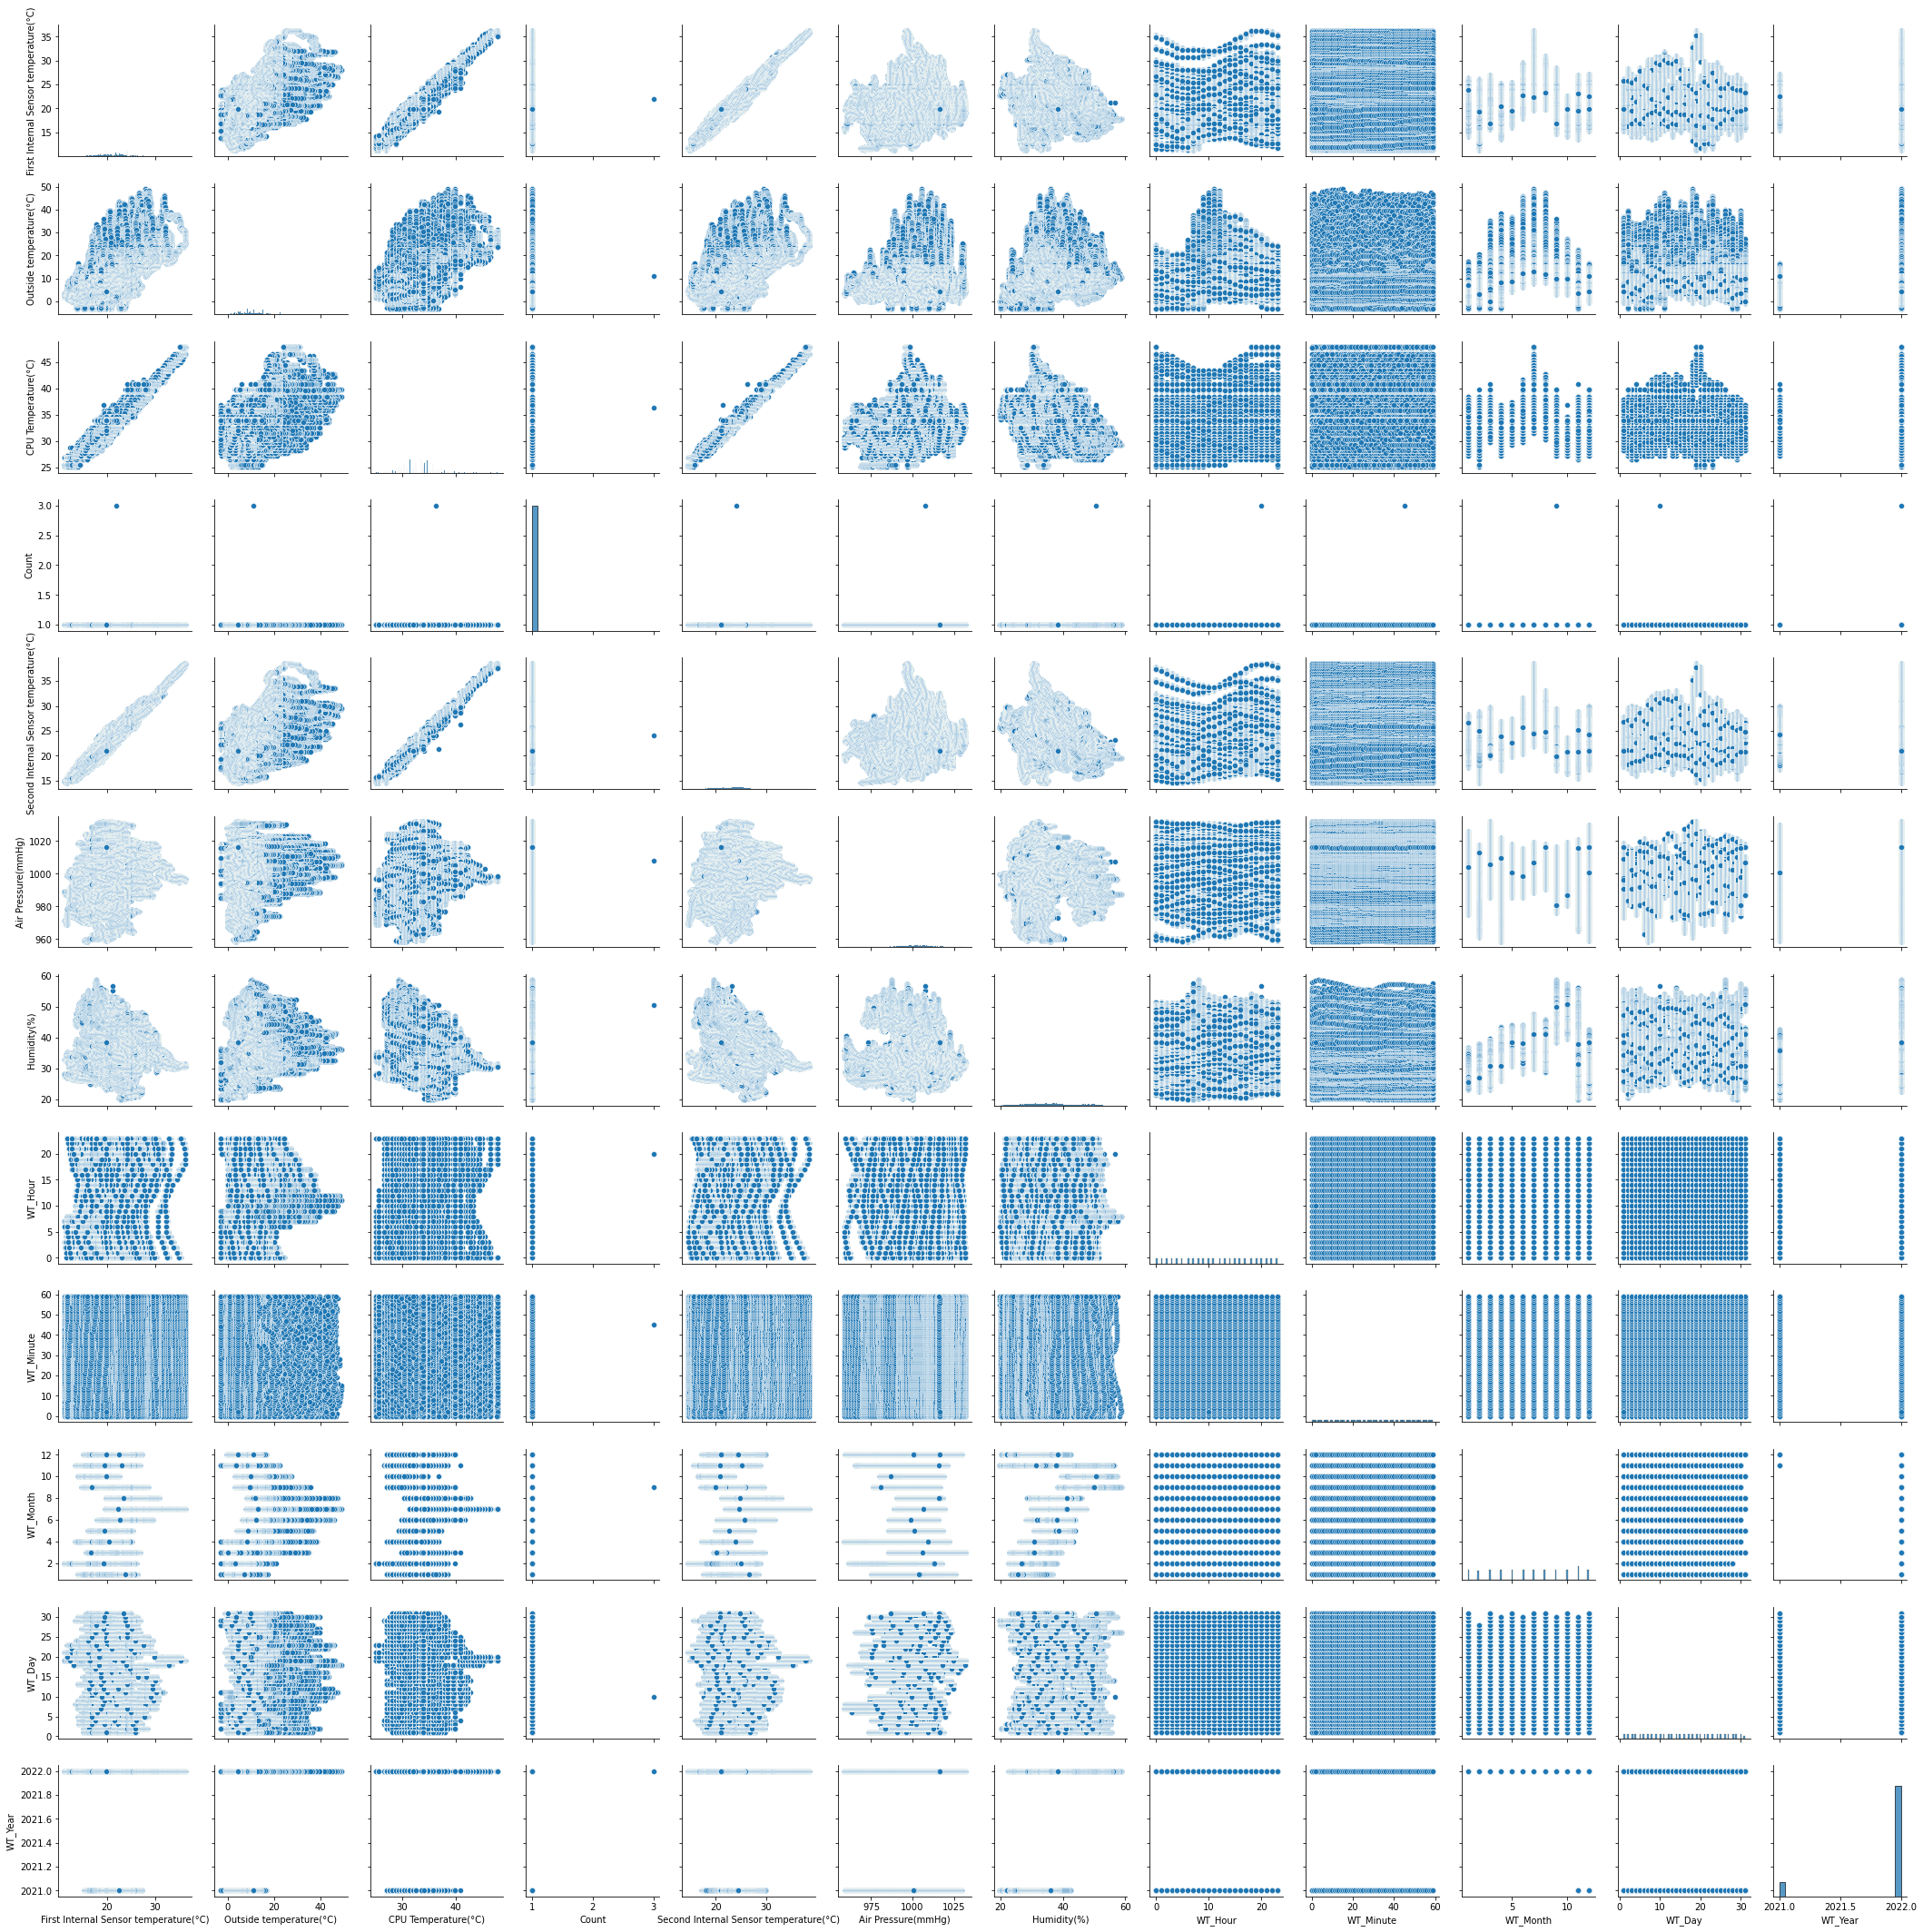

In [24]:
%matplotlib inline
sns.pairplot(Weather_data)
plt.show()


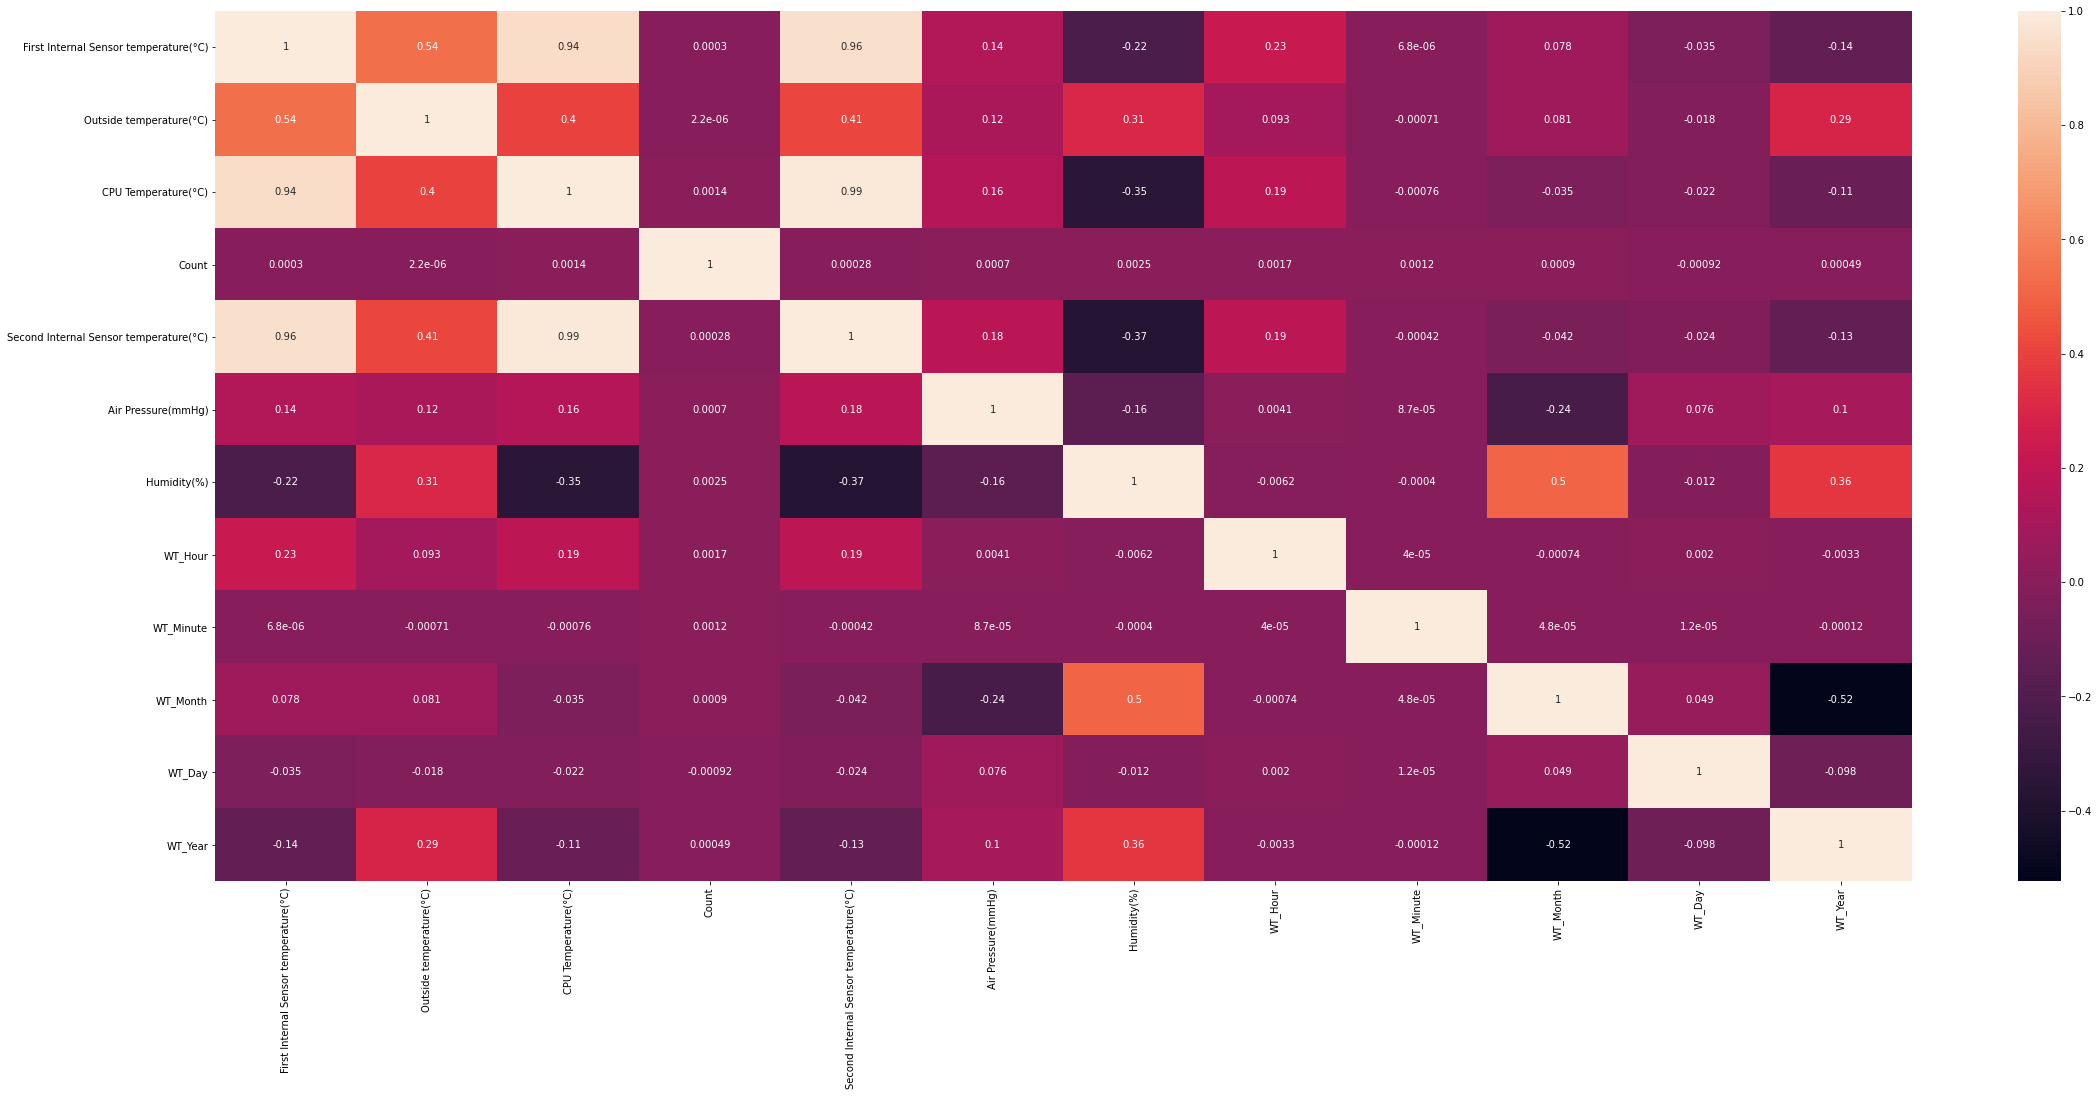

In [25]:
plt.figure(figsize = (38,16))
sns.heatmap(Weather_data.corr(), annot = True)
plt.show()

### Splitting the Data into Train and Test Data

In [139]:
TrainData=Weather_data[Weather_data['WT_Month']>=10]
TestData=Weather_data[Weather_data['WT_Month']>10]

In [140]:
TrainData

,First Internal Sensor temperature(°C),Outside temperature(°C),CPU Temperature(°C),Count,Second Internal Sensor temperature(°C),Air Pressure(mmHg),Humidity(%),WT_Hour,WT_Minute,WT_Month,WT_Day,WT_Year
Date and time,,,,,,,,,,,,
2021-11-17 15:21:02+00:00,24.2,9.8,36.318,1,26.22,1006.76,31.03,15,21,11,17,2021
2021-11-17 15:22:03+00:00,24.2,9.8,36.856,1,26.24,1006.80,30.98,15,22,11,17,2021
2021-11-17 15:23:05+00:00,24.2,9.8,40.840,1,26.28,1006.84,30.91,15,23,11,17,2021
2021-11-17 15:24:02+00:00,24.2,9.8,36.856,1,26.47,1006.86,30.77,15,24,11,17,2021
2021-11-17 15:25:03+00:00,24.2,9.8,36.856,1,26.59,1006.90,30.57,15,25,11,17,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01 09:58:02+00:00,19.9,4.5,31.476,1,21.17,1016.14,38.35,9,58,12,1,2022
2022-12-01 09:59:03+00:00,19.9,4.5,32.140,1,21.14,1016.12,38.39,9,59,12,1,2022
2022-12-01 10:00:02+00:00,19.9,4.5,32.140,1,21.15,1016.14,38.27,10,0,12,1,2022


In [ ]:
TestData

In [ ]:
TrainData.info()

In [ ]:
TestData.info()

In [ ]:
TrainData.describe()

In [ ]:
TestData.describe()

In [ ]:
TrainData.duplicated().sum()

In [ ]:
TestData.duplicated().sum()

<h1><center>Data Analysis<center>

<h2><center><strong>Applying Regression Models for "First internal Sensore temperature" data and analysis it using MSE and RMSE</strong></center></h2>
    

In [141]:
<h1><center><strong>Applying Regression Models for "Outside temperature" data and analysis it using MSE and RMSE</strong></center></h1>
    

In [142]:
XTrain=XTrain.reset_index(drop=True)

In [143]:
YTrain=YTrain.reset_index(drop=True)

In [32]:
#Weather feature 1 - First Internal sensore temperature
#Random Forest regression model
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(XTrain, YTrain)  

RandomForestRegressor(random_state=0)

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
Y_pred = regressor.predict(XTest)  # test the output by changing values
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,Y_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,Y_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,Y_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 0.043
Mean Absolute Error:  0.862
Mean Squared Error:  0.028


In [47]:
#KNN Regression model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
model_knn=knn.fit(XTrain,YTrain)
y_knn_pred=model_knn.predict(XTest)
KNN_MSE=mean_squared_error(YTest,y_knn_pred) #### calculating the mse score
KNN_MAE=mean_absolute_error(YTest,y_knn_pred) #### calculating the mse score
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_knn_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_knn_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_knn_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 0.412
Mean Absolute Error:  8.232
Mean Squared Error:  1.461


In [48]:
#Gradient Boosting Regression model
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(XTrain, YTrain)

GradientBoostingRegressor()

In [49]:
GB_pred=reg.predict(XTest)
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,GB_pred),3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,GB_pred),4))
print('Mean Squared Error: ', round(mean_squared_error(YTest,GB_pred),4))

Mean Absolute Percentage Error (MAPE): 0.013
Mean Absolute Error:  0.2507
Mean Squared Error:  0.106


In [50]:
#RNN Model
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,SpatialDropout1D,Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
RNN = Sequential() #### calling sequancial for training 
RNN.add(Dense(64,input_shape=(11,))) #### taking the inputs 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes
RNN.add(Activation('relu')) #### for the outputs of next layer
RNN.add(Dense(32)) #### for the outputs of next layer 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes again 
RNN.add(Activation('relu')) #### for the outputs of next layer 
RNN.add(Dense(1))

In [17]:
RNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3

In [51]:
RNN.compile(loss='mean_squared_error', optimizer=Adam())
RNN.fit(XTrain, YTrain,epochs=20, batch_size=32, verbose=2)

Epoch 1/20
4762/4762 - 5s - loss: 848.8698
Epoch 2/20
4762/4762 - 5s - loss: 26.6275
Epoch 3/20
4762/4762 - 5s - loss: 13.0180
Epoch 4/20
4762/4762 - 5s - loss: 6.9369
Epoch 5/20
4762/4762 - 5s - loss: 4.5291
Epoch 6/20
4762/4762 - 5s - loss: 2.8843
Epoch 7/20
4762/4762 - 5s - loss: 1.8997
Epoch 8/20
4762/4762 - 5s - loss: 1.4270
Epoch 9/20
4762/4762 - 5s - loss: 1.2299
Epoch 10/20
4762/4762 - 5s - loss: 1.1248
Epoch 11/20
4762/4762 - 5s - loss: 1.0950
Epoch 12/20
4762/4762 - 5s - loss: 1.0811
Epoch 13/20
4762/4762 - 5s - loss: 1.0659
Epoch 14/20
4762/4762 - 5s - loss: 1.0127
Epoch 15/20
4762/4762 - 5s - loss: 1.0522
Epoch 16/20
4762/4762 - 5s - loss: 1.0354
Epoch 17/20
4762/4762 - 5s - loss: 1.0804
Epoch 18/20
4762/4762 - 5s - loss: 1.1078
Epoch 19/20
4762/4762 - 5s - loss: 1.1050
Epoch 20/20
4762/4762 - 5s - loss: 1.0989


In [52]:
y_pred_test = RNN.predict(XTest)

In [323]:
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_pred_test),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_pred_test),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_pred_test),4))


Mean Squared Error:  2.0123
Mean Absolute Percentage Error (MAPE): 0.0557
Mean Absolute Error:  1.1875


In [ ]:
#SNN Model
model = Sequential()
#model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['mse','acc'])
sns_history = model.fit(XTrain,YTrain, batch_size=128,epochs=6,verbose=1,validation_split=0.2)
S_Score=model.evaluate(XTest, YTest,verbose=1)
SNN_Predict = model.predict( XTest )

In [324]:
print('Mean Squared Error: ', round(mean_squared_error(YTest,SNN_Predict),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,SNN_Predict),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,SNN_Predict),4))

Epoch 1/6

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

953/953 [==============================] - 1s 1ms/step - loss: 5112.1050 - mse: 410.7223 - acc: 0.0000e+00 - val_loss: -20940.2031 - val_mse: 280.8711 - val_acc: 0.0000e+00
Epoch 2/6
953/953 [==============================] - 1s 1ms/step - loss: -53643.4609 - mse: 387.7265 - acc: 0.0000e+00 - val_loss: -71067.5859 - val_mse: 280.8711 - val_acc: 0.0000e+00
Epoch 3/6
953/953 [==============================] - 1s 1ms/step - loss: -112535.7031 - mse: 387.7264 - acc: 0.0000e+00 - val_loss: -121645.

## Comparison Table for MSE score of all regression models

In [322]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "MSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(mean_squared_error(YTest,Y_pred)*100,3)])
x.add_row(["GradientBoostingRegressor Algorithm", round(mean_squared_error(YTest,GB_pred),3)]) 
x.add_row(["KNN Regression Algorithm", round(mean_squared_error(YTest,y_knn_pred),3)]) 
x.add_row(["RNN Algorithm", round(mean_squared_error(YTest,y_pred_test),3)])  
x.add_row(["SNN Algorithm", round(mean_squared_error(YTest,SNN_Predict),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+-----------+
|                Model                | MSE score |
+-------------------------------------+-----------+
|   RandomForestRegressor Algorithm   |   0.028   |
| GradientBoostingRegressor Algorithm |   0.106   |
|       KNN Regression Algorithm      |   0.015   |
|            RNN Algorithm            |   2.012   |
|            SNN Algorithm            |  387.533  |
+-------------------------------------+-----------+




## Comparison Table for RMSE score of all regression models

In [346]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "RMSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(math.sqrt(mean_squared_error(YTest,Y_pred)*100),3)])
x.add_row(["GradientBoostingRegressor Algorithm", round(math.sqrt(mean_squared_error(YTest,GB_pred)),3)]) 
x.add_row(["KNN Regression Algorithm", round(math.sqrt(mean_squared_error(YTest,y_knn_pred)),3)]) 
x.add_row(["RNN Algorithm", round(math.sqrt(mean_squared_error(YTest,y_pred_test)),3)]) 
x.add_row(["SNN Algorithm", round(math.sqrt(mean_squared_error(YTest,SNN_Predict)),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+------------+
|                Model                | RMSE score |
+-------------------------------------+------------+
|   RandomForestRegressor Algorithm   |   0.508    |
| GradientBoostingRegressor Algorithm |   1.427    |
|       KNN Regression Algorithm      |   0.314    |
|            RNN Algorithm            |   3.058    |
|            SNN Algorithm            |   6.481    |
+-------------------------------------+------------+




### Forecasting for 'First Internal Sensor temperature' future values ahead by 5 min,10 min, 15 min, 30 min and 
<h3><center>followed by 1, 2, 6, 12 hours future values</center></h3>


In [361]:
def DateRangeTable(data1):
    data1['Minute'] = data1['DateTimeRange'].dt.minute # extracting minute from data
    data1['Hour'] = data1['DateTimeRange'].dt.hour # extracting hours from data
    data1['Month'] = data1['DateTimeRange'].dt.month # extracting months from data
    data1['Day'] = data1['DateTimeRange'].dt.day # extracting day from data
    data1['Year'] = data1['DateTimeRange'].dt.year # extracting year from data
    X=data1[['Minute','Hour','Month','Day','Year']]
    return X

In [271]:
MLP_model = MLPRegressor()
MLP_model.fit(Weather_data[['WT_Minute','WT_Hour','WT_Month','WT_Day','WT_Year']], Weather_data['First Internal Sensor temperature(°C)'])

MLPRegressor()

In [272]:
#Getting the data range from current time to respective future time value required
Daterange_5min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='5min'),columns=['DateTimeRange'])
Daterange_10min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='10min'),columns=['DateTimeRange'])
Daterange_15min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='15min'),columns=['DateTimeRange'])
Daterange_30min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='30min'),columns=['DateTimeRange'])
Daterange_60min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='60min'),columns=['DateTimeRange'])
Daterange_120min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='120min'),columns=['DateTimeRange'])
Daterange_360min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='360min'),columns=['DateTimeRange'])
Daterange_720min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='720min'),columns=['DateTimeRange'])

In [273]:
#setting the DataFrame index to timestamp value 'DateTimeRange'
Daterange_5min.index=Daterange_5min['DateTimeRange']
Daterange_10min.index=Daterange_10min['DateTimeRange']
Daterange_15min.index=Daterange_15min['DateTimeRange']
Daterange_30min.index=Daterange_30min['DateTimeRange']
Daterange_60min.index=Daterange_60min['DateTimeRange']
Daterange_120min.index=Daterange_120min['DateTimeRange']
Daterange_360min.index=Daterange_360min['DateTimeRange']
Daterange_720min.index=Daterange_720min['DateTimeRange']

In [274]:
#Applying the DateRangeTable function to parse the timestamp and get individual column as month,year,day,hour,min
Daterange_5min=DateRangeTable(Daterange_5min)
Daterange_10min=DateRangeTable(Daterange_10min)
Daterange_15min=DateRangeTable(Daterange_15min)
Daterange_30min=DateRangeTable(Daterange_30min)
Daterange_60min=DateRangeTable(Daterange_60min)
Daterange_120min=DateRangeTable(Daterange_120min)
Daterange_360min=DateRangeTable(Daterange_360min)
Daterange_720min=DateRangeTable(Daterange_720min)

In [275]:
#Converting the DataFrame to np array
Daterange_5min_arr=np.array(Daterange_5min)
Daterange_10min_arr=np.array(Daterange_10min)
Daterange_15min_arr=np.array(Daterange_15min)
Daterange_30min_arr=np.array(Daterange_30min)
Daterange_60min_arr=np.array(Daterange_60min)
Daterange_120min_arr=np.array(Daterange_120min)
Daterange_360min_arr=np.array(Daterange_360min)
Daterange_720min_arr=np.array(Daterange_720min)

In [296]:
#Predicting the future values for the respective future value
MLP_Pred_5min=MLP_model.predict(Daterange_5min_arr)
MLP_Pred_10min=MLP_model.predict(Daterange_10min_arr)
MLP_Pred_15min=MLP_model.predict(Daterange_15min_arr)
MLP_Pred_30min=MLP_model.predict(Daterange_30min_arr)
MLP_Pred_60min=MLP_model.predict(Daterange_60min_arr)
MLP_Pred_120min=MLP_model.predict(Daterange_120min_arr)
MLP_Pred_360min=MLP_model.predict(Daterange_360min_arr)
MLP_Pred_720min=MLP_model.predict(Daterange_720min_arr)

In [454]:
#converting the predicted values in to dataframes for all the future values requested and changing the index of the resulting DataFrame to DateTimeRange Index
IT_PredictedTable_5=pd.DataFrame(MLP_Pred_5min,columns=['Internal sensor Temperature Temperature1'])
IT_PredictedTable_5.index=Daterange_5min.index
IT_PredictedTable_10=pd.DataFrame(MLP_Pred_10min,columns=['Internal sensor Temperature Temperature2'])
IT_PredictedTable_10.index=Daterange_10min.index
IT_PredictedTable_15=pd.DataFrame(MLP_Pred_15min,columns=['Internal sensor Temperature Temperature3'])
IT_PredictedTable_15.index=Daterange_15min.index
IT_PredictedTable_30=pd.DataFrame(MLP_Pred_30min,columns=['Internal sensor Temperature Temperature4'])
IT_PredictedTable_30.index=Daterange_30min.index
IT_PredictedTable_60=pd.DataFrame(MLP_Pred_60min,columns=['Internal sensor Temperature Temperature5'])
IT_PredictedTable_60.index=Daterange_60min.index
IT_PredictedTable_120=pd.DataFrame(MLP_Pred_120min,columns=['Internal sensor Temperature Temperature6'])
IT_PredictedTable_120.index=Daterange_120min.index
IT_PredictedTable_360=pd.DataFrame(MLP_Pred_360min,columns=['Internal sensor Temperature Temperature7'])
IT_PredictedTable_360.index=Daterange_360min.index
IT_PredictedTable_720=pd.DataFrame(MLP_Pred_720min,columns=['Internal sensor Temperature Temperature8'])
IT_PredictedTable_720.index=Daterange_720min.index

In [308]:
IT=input("Enter a future value in this list[5,10,15,30,60,120,360,720]:\t\t")

Enter a future value in this list[5,10,15,30,60,120,360,720]:		5


In [320]:
print_string='IT_PredictedTable_'+IT
print('Forecasted First sensor temperature '+IT+' minute future value:\n\n\n',globals()[print_string])

Forecasted First sensor temperature5 minute future value:


                             Forecasted Temperature1
DateTimeRange                                      
2023-01-27 03:41:44.538761                 5.246371
2023-01-27 03:46:44.538761                 5.256394


<h1><center><strong>Applying Regression Models for "Outside temperature" data and analysis it using MSE and RMSE</strong></center></h1>
    

In [328]:
XTrain=TrainData.drop(columns=['Outside temperature(°C)'])
YTrain=TrainData['Outside temperature(°C)']
XTest=TestData.drop(columns=['Outside temperature(°C)'])
YTest=TestData['Outside temperature(°C)']

In [329]:
XTrain=XTrain.reset_index(drop=True)
YTrain=YTrain.reset_index(drop=True)

In [330]:
#RandomForest Regression Model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor.fit(XTrain, YTrain) 
Y_pred = regressor.predict(XTest)  # test the output by changing values
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,Y_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,Y_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,Y_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 17410974209936.78
Mean Absolute Error:  2.148
Mean Squared Error:  0.258


In [331]:
#KNN Regression model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
model_knn=knn.fit(XTrain,YTrain)
y_knn_pred=model_knn.predict(XTest)
KNN_MSE=mean_squared_error(YTest,y_knn_pred) #### calculating the mse score
KNN_MAE=mean_absolute_error(YTest,y_knn_pred) #### calculating the mse score
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_knn_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_knn_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_knn_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 125469427407663.6
Mean Absolute Error:  17.534
Mean Squared Error:  9.861


In [332]:
#Gradient Boosting Regression model
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(XTrain, YTrain)
GB_pred=reg.predict(XTest)
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,GB_pred),3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,GB_pred),4))
print('Mean Squared Error: ', round(mean_squared_error(YTest,GB_pred),4))

Mean Absolute Percentage Error (MAPE): 12839293193894.707
Mean Absolute Error:  1.1005
Mean Squared Error:  2.0362


In [333]:
#RNN Model
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,SpatialDropout1D,Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
RNN = Sequential() #### calling sequancial for training 
RNN.add(Dense(64,input_shape=(11,))) #### taking the inputs 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes
RNN.add(Activation('relu')) #### for the outputs of next layer
RNN.add(Dense(32)) #### for the outputs of next layer 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes again 
RNN.add(Activation('relu')) #### for the outputs of next layer 
RNN.add(Dense(1))

In [334]:
RNN.compile(loss='mean_squared_error', optimizer=Adam())
RNN.fit(XTrain, YTrain,epochs=20, batch_size=32, verbose=2)
y_pred_test = RNN.predict(XTest)
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_pred_test),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_pred_test),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_pred_test),4))


Epoch 1/20
4762/4762 - 5s - loss: 470.2549
Epoch 2/20
4762/4762 - 5s - loss: 19.8767
Epoch 3/20
4762/4762 - 5s - loss: 14.6526
Epoch 4/20
4762/4762 - 5s - loss: 10.7963
Epoch 5/20
4762/4762 - 5s - loss: 9.5614
Epoch 6/20
4762/4762 - 5s - loss: 8.9982
Epoch 7/20
4762/4762 - 5s - loss: 8.8796
Epoch 8/20
4762/4762 - 5s - loss: 9.2568
Epoch 9/20
4762/4762 - 5s - loss: 9.4658
Epoch 10/20
4762/4762 - 5s - loss: 9.2677
Epoch 11/20
4762/4762 - 5s - loss: 9.2032
Epoch 12/20
4762/4762 - 6s - loss: 9.1816
Epoch 13/20
4762/4762 - 5s - loss: 9.1581
Epoch 14/20
4762/4762 - 5s - loss: 8.9964
Epoch 15/20
4762/4762 - 5s - loss: 9.0705
Epoch 16/20
4762/4762 - 5s - loss: 9.3995
Epoch 17/20
4762/4762 - 5s - loss: 9.4325
Epoch 18/20
4762/4762 - 5s - loss: 9.3589
Epoch 19/20
4762/4762 - 5s - loss: 9.3688
Epoch 20/20
4762/4762 - 5s - loss: 9.2025
Mean Squared Error:  9.3524
Mean Absolute Percentage Error (MAPE): 35388136362548.46
Mean Absolute Error:  2.4344


In [335]:
#SNN Model
model = Sequential()
#model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['mse','acc'])
sns_history = model.fit(XTrain,YTrain, batch_size=128,epochs=6,verbose=1,validation_split=0.2)
S_Score=model.evaluate(XTest, YTest,verbose=1)
SNN_Predict = model.predict( XTest )
print('Mean Squared Error: ', round(mean_squared_error(YTest,SNN_Predict),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,SNN_Predict),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,SNN_Predict),4))

Epoch 1/6

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

953/953 [==============================] - 1s 2ms/step - loss: -10059.5674 - mse: 68.3521 - acc: 8.4492e-04 - val_loss: -18217.3086 - val_mse: 51.0716 - val_acc: 0.0012
Epoch 2/6
953/953 [==============================] - 1s 1ms/step - loss: -31707.0176 - mse: 67.9243 - acc: 8.4492e-04 - val_loss: -37141.2930 - val_mse: 51.0716 - val_acc: 0.0012
Epoch 3/6
953/953 [==============================] - 1s 1ms/step - loss: -53427.4219 - mse: 67.9242 - acc: 8.4492e-04 - val_loss: -56096.9961 - val_ms

## Comparison Table for MSE score of all regression models

In [336]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "MSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(mean_squared_error(YTest,Y_pred)*100,3)])
x.add_row(["GradientBoostingRegressor Algorithm", round(mean_squared_error(YTest,GB_pred),3)]) 
x.add_row(["KNN Regression Algorithm", round(mean_squared_error(YTest,y_knn_pred),3)]) 
x.add_row(["RNN Algorithm", round(mean_squared_error(YTest,y_pred_test),3)])  
x.add_row(["SNN Algorithm", round(mean_squared_error(YTest,SNN_Predict),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+-----------+
|                Model                | MSE score |
+-------------------------------------+-----------+
|   RandomForestRegressor Algorithm   |   0.258   |
| GradientBoostingRegressor Algorithm |   2.036   |
|       KNN Regression Algorithm      |   0.099   |
|            RNN Algorithm            |   9.352   |
|            SNN Algorithm            |   42.008  |
+-------------------------------------+-----------+




## Comparison Table for RMSE score of all regression models

In [342]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "RMSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(math.sqrt(mean_squared_error(YTest,Y_pred)),3)])
x.add_row(["GradientBoostingRegressor Algorithm",round(math.sqrt(mean_squared_error(YTest,GB_pred)),3)]) 
x.add_row(["KNN Regression Algorithm", round(math.sqrt(mean_squared_error(YTest,y_knn_pred)),3)]) 
x.add_row(["RNN Algorithm", round(math.sqrt(mean_squared_error(YTest,y_pred_test)),3)])  
x.add_row(["SNN Algorithm", round(math.sqrt(mean_squared_error(YTest,SNN_Predict)),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+------------+
|                Model                | RMSE score |
+-------------------------------------+------------+
|   RandomForestRegressor Algorithm   |   0.051    |
| GradientBoostingRegressor Algorithm |   1.427    |
|       KNN Regression Algorithm      |   0.314    |
|            RNN Algorithm            |   3.058    |
|            SNN Algorithm            |   6.481    |
+-------------------------------------+------------+




### Forecasting for 'Outside temperature' future values ahead by 5 min,10 min, 15 min, 30 min and 
<h3><center>followed by 1, 2, 6, 12 hours future values</center></h3>


In [347]:
MLP_model = MLPRegressor()
MLP_model.fit(Weather_data[['WT_Minute','WT_Hour','WT_Month','WT_Day','WT_Year']], Weather_data['Outside temperature(°C)'])

MLPRegressor()

In [362]:
#Getting the data range from current time to respective future time value required
Daterange_5min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='5min'),columns=['DateTimeRange'])
Daterange_10min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='10min'),columns=['DateTimeRange'])
Daterange_15min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='15min'),columns=['DateTimeRange'])
Daterange_30min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='30min'),columns=['DateTimeRange'])
Daterange_60min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='60min'),columns=['DateTimeRange'])
Daterange_120min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='120min'),columns=['DateTimeRange'])
Daterange_360min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='360min'),columns=['DateTimeRange'])
Daterange_720min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='720min'),columns=['DateTimeRange'])

In [363]:
#setting the DataFrame index to timestamp value 'DateTimeRange'
Daterange_5min.index=Daterange_5min['DateTimeRange']
Daterange_10min.index=Daterange_10min['DateTimeRange']
Daterange_15min.index=Daterange_15min['DateTimeRange']
Daterange_30min.index=Daterange_30min['DateTimeRange']
Daterange_60min.index=Daterange_60min['DateTimeRange']
Daterange_120min.index=Daterange_120min['DateTimeRange']
Daterange_360min.index=Daterange_360min['DateTimeRange']
Daterange_720min.index=Daterange_720min['DateTimeRange']

In [364]:
#Applying the DateRangeTable function to parse the timestamp and get individual column as month,year,day,hour,min
Daterange_5min=DateRangeTable(Daterange_5min)
Daterange_10min=DateRangeTable(Daterange_10min)
Daterange_15min=DateRangeTable(Daterange_15min)
Daterange_30min=DateRangeTable(Daterange_30min)
Daterange_60min=DateRangeTable(Daterange_60min)
Daterange_120min=DateRangeTable(Daterange_120min)
Daterange_360min=DateRangeTable(Daterange_360min)
Daterange_720min=DateRangeTable(Daterange_720min)

In [365]:
#Converting the DataFrame to np array
Daterange_5min_arr=np.array(Daterange_5min)
Daterange_10min_arr=np.array(Daterange_10min)
Daterange_15min_arr=np.array(Daterange_15min)
Daterange_30min_arr=np.array(Daterange_30min)
Daterange_60min_arr=np.array(Daterange_60min)
Daterange_120min_arr=np.array(Daterange_120min)
Daterange_360min_arr=np.array(Daterange_360min)
Daterange_720min_arr=np.array(Daterange_720min)

In [366]:
#Predicting the future values for the respective future value
MLP_Pred_5min=MLP_model.predict(Daterange_5min_arr)
MLP_Pred_10min=MLP_model.predict(Daterange_10min_arr)
MLP_Pred_15min=MLP_model.predict(Daterange_15min_arr)
MLP_Pred_30min=MLP_model.predict(Daterange_30min_arr)
MLP_Pred_60min=MLP_model.predict(Daterange_60min_arr)
MLP_Pred_120min=MLP_model.predict(Daterange_120min_arr)
MLP_Pred_360min=MLP_model.predict(Daterange_360min_arr)
MLP_Pred_720min=MLP_model.predict(Daterange_720min_arr)

In [367]:
#converting the predicted values in to dataframes for all the future values requested and changing the index of the resulting DataFrame to DateTimeRange Index
OT_PredictedTable_5=pd.DataFrame(MLP_Pred_5min,columns=['Outside Temperature1'])
OT_PredictedTable_5.index=Daterange_5min.index
OT_PredictedTable_10=pd.DataFrame(MLP_Pred_10min,columns=['Outside Temperature2'])
OT_PredictedTable_10.index=Daterange_10min.index
OT_PredictedTable_15=pd.DataFrame(MLP_Pred_15min,columns=['Outside Temperature3'])
OT_PredictedTable_15.index=Daterange_15min.index
OT_PredictedTable_30=pd.DataFrame(MLP_Pred_30min,columns=['Outside Temperature4'])
OT_PredictedTable_30.index=Daterange_30min.index
OT_PredictedTable_60=pd.DataFrame(MLP_Pred_60min,columns=['Outside Temperature5'])
OT_PredictedTable_60.index=Daterange_60min.index
OT_PredictedTable_120=pd.DataFrame(MLP_Pred_120min,columns=['Outside Temperature6'])
OT_PredictedTable_120.index=Daterange_120min.index
OT_PredictedTable_360=pd.DataFrame(MLP_Pred_360min,columns=['Outside Temperature7'])
OT_PredictedTable_360.index=Daterange_360min.index
OT_PredictedTable_720=pd.DataFrame(MLP_Pred_720min,columns=['Outside Temperature8'])
OT_PredictedTable_720.index=Daterange_720min.index

In [371]:
OT=input("Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future outside temperature:\t\t")

Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future outside temperature:		60


In [372]:
print_string='OT_PredictedTable_'+OT
print('Outside temperature '+s+' minute future value:\n\n\n',globals()[print_string])

Outside temperature5 minute future value:


                             Outside Temperature5
DateTimeRange                                   
2023-01-27 05:57:11.507331              2.805617
2023-01-27 06:57:11.507331              3.577336


<h1><center><strong>Applying Regression Models for "CPU Temperature(°C)" data and analysis it using MSE and RMSE</strong></center></h1>
    

In [373]:
XTrain=TrainData.drop(columns=['CPU Temperature(°C)'])
YTrain=TrainData['CPU Temperature(°C)']
XTest=TestData.drop(columns=['CPU Temperature(°C)'])
YTest=TestData['CPU Temperature(°C)']

In [374]:
XTrain=XTrain.reset_index(drop=True)
YTrain=YTrain.reset_index(drop=True)

In [375]:
#RandomForest Regression Model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor.fit(XTrain, YTrain) 
Y_pred = regressor.predict(XTest)  # test the output by changing values
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,Y_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,Y_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,Y_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 0.296
Mean Absolute Error:  9.527
Mean Squared Error:  1.71


In [376]:
#KNN Regression model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
model_knn=knn.fit(XTrain,YTrain)
y_knn_pred=model_knn.predict(XTest)
KNN_MSE=mean_squared_error(YTest,y_knn_pred) #### calculating the mse score
KNN_MAE=mean_absolute_error(YTest,y_knn_pred) #### calculating the mse score
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_knn_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_knn_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_knn_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 0.704
Mean Absolute Error:  22.652
Mean Squared Error:  9.191


In [377]:
#Gradient Boosting Regression model
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(XTrain, YTrain)
GB_pred=reg.predict(XTest)
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,GB_pred),3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,GB_pred),4))
print('Mean Squared Error: ', round(mean_squared_error(YTest,GB_pred),4))

Mean Absolute Percentage Error (MAPE): 0.009
Mean Absolute Error:  0.2778
Mean Squared Error:  0.1312


In [378]:
#RNN Model
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,SpatialDropout1D,Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
RNN = Sequential() #### calling sequancial for training 
RNN.add(Dense(64,input_shape=(11,))) #### taking the inputs 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes
RNN.add(Activation('relu')) #### for the outputs of next layer
RNN.add(Dense(32)) #### for the outputs of next layer 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes again 
RNN.add(Activation('relu')) #### for the outputs of next layer 
RNN.add(Dense(1))

In [379]:
RNN.compile(loss='mean_squared_error', optimizer=Adam())
RNN.fit(XTrain, YTrain,epochs=20, batch_size=32, verbose=2)
y_pred_test = RNN.predict(XTest)
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_pred_test),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_pred_test),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_pred_test),4))


Epoch 1/20
4762/4762 - 5s - loss: 1033.9083
Epoch 2/20
4762/4762 - 5s - loss: 50.2112
Epoch 3/20
4762/4762 - 5s - loss: 33.4482
Epoch 4/20
4762/4762 - 5s - loss: 22.7087
Epoch 5/20
4762/4762 - 5s - loss: 16.4981
Epoch 6/20
4762/4762 - 5s - loss: 12.2541
Epoch 7/20
4762/4762 - 5s - loss: 8.4763
Epoch 8/20
4762/4762 - 5s - loss: 5.4701
Epoch 9/20
4762/4762 - 5s - loss: 4.0694
Epoch 10/20
4762/4762 - 5s - loss: 3.0080
Epoch 11/20
4762/4762 - 5s - loss: 2.1988
Epoch 12/20
4762/4762 - 5s - loss: 1.6853
Epoch 13/20
4762/4762 - 5s - loss: 1.3426
Epoch 14/20
4762/4762 - 5s - loss: 1.1690
Epoch 15/20
4762/4762 - 5s - loss: 1.0810
Epoch 16/20
4762/4762 - 5s - loss: 1.0386
Epoch 17/20
4762/4762 - 5s - loss: 1.0284
Epoch 18/20
4762/4762 - 5s - loss: 1.0648
Epoch 19/20
4762/4762 - 5s - loss: 1.0526
Epoch 20/20
4762/4762 - 5s - loss: 1.0413
Mean Squared Error:  0.9553
Mean Absolute Percentage Error (MAPE): 0.0259
Mean Absolute Error:  0.8284


In [380]:
#SNN Model
model = Sequential()
#model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['mse','acc'])
sns_history = model.fit(XTrain,YTrain, batch_size=128,epochs=6,verbose=1,validation_split=0.2)
S_Score=model.evaluate(XTest, YTest,verbose=1)
SNN_Predict = model.predict( XTest )
print('Mean Squared Error: ', round(mean_squared_error(YTest,SNN_Predict),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,SNN_Predict),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,SNN_Predict),4))

Epoch 1/6

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

953/953 [==============================] - 1s 1ms/step - loss: -3815.2881 - mse: 1021.7531 - acc: 0.0000e+00 - val_loss: -47204.9766 - val_mse: 836.2844 - val_acc: 0.0000e+00
Epoch 2/6
953/953 [==============================] - 1s 1ms/step - loss: -98318.8516 - mse: 992.7939 - acc: 0.0000e+00 - val_loss: -134262.8281 - val_mse: 836.2844 - val_acc: 0.0000e+00
Epoch 3/6
953/953 [==============================] - 1s 1ms/step - loss: -193147.1562 - mse: 992.7941 - acc: 0.0000e+00 - val_loss: -2216

## Comparison Table for MSE score of all regression models

In [465]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "MSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(mean_squared_error(YTest,Y_pred),3)])
x.add_row(["GradientBoostingRegressor Algorithm", round(mean_squared_error(YTest,GB_pred),3)]) 
x.add_row(["KNN Regression Algorithm", round(mean_squared_error(YTest,y_knn_pred),3)]) 
x.add_row(["RNN Algorithm", round(mean_squared_error(YTest,y_pred_test),3)])  
x.add_row(["SNN Algorithm", round(mean_squared_error(YTest,SNN_Predict),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+-----------+
|                Model                | MSE score |
+-------------------------------------+-----------+
|   RandomForestRegressor Algorithm   |   0.003   |
| GradientBoostingRegressor Algorithm |   2.036   |
|       KNN Regression Algorithm      |   0.099   |
|            RNN Algorithm            |   7.247   |
|            SNN Algorithm            |   42.008  |
+-------------------------------------+-----------+




## Comparison Table for RMSE score of all regression models

In [382]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "RMSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(math.sqrt(mean_squared_error(YTest,Y_pred)),3)])
x.add_row(["GradientBoostingRegressor Algorithm",round(math.sqrt(mean_squared_error(YTest,GB_pred)),3)]) 
x.add_row(["KNN Regression Algorithm", round(math.sqrt(mean_squared_error(YTest,y_knn_pred)),3)]) 
x.add_row(["RNN Algorithm", round(math.sqrt(mean_squared_error(YTest,y_pred_test)),3)])  
x.add_row(["SNN Algorithm", round(math.sqrt(mean_squared_error(YTest,SNN_Predict)),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+------------+
|                Model                | RMSE score |
+-------------------------------------+------------+
|   RandomForestRegressor Algorithm   |   0.131    |
| GradientBoostingRegressor Algorithm |   0.362    |
|       KNN Regression Algorithm      |   0.303    |
|            RNN Algorithm            |   0.977    |
|            SNN Algorithm            |   31.46    |
+-------------------------------------+------------+




### Forecasting for 'CPU Temperature(°C)' future values ahead by 5 min,10 min, 15 min, 30 min and 
<h3><center>followed by 1, 2, 6, 12 hours future values</center></h3>


In [383]:
MLP_model = MLPRegressor()
MLP_model.fit(Weather_data[['WT_Minute','WT_Hour','WT_Month','WT_Day','WT_Year']], Weather_data['CPU Temperature(°C)'])

MLPRegressor()

In [384]:
#Getting the data range from current time to respective future time value required
Daterange_5min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='5min'),columns=['DateTimeRange'])
Daterange_10min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='10min'),columns=['DateTimeRange'])
Daterange_15min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='15min'),columns=['DateTimeRange'])
Daterange_30min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='30min'),columns=['DateTimeRange'])
Daterange_60min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='60min'),columns=['DateTimeRange'])
Daterange_120min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='120min'),columns=['DateTimeRange'])
Daterange_360min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='360min'),columns=['DateTimeRange'])
Daterange_720min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='720min'),columns=['DateTimeRange'])

In [385]:
#setting the DataFrame index to timestamp value 'DateTimeRange'
Daterange_5min.index=Daterange_5min['DateTimeRange']
Daterange_10min.index=Daterange_10min['DateTimeRange']
Daterange_15min.index=Daterange_15min['DateTimeRange']
Daterange_30min.index=Daterange_30min['DateTimeRange']
Daterange_60min.index=Daterange_60min['DateTimeRange']
Daterange_120min.index=Daterange_120min['DateTimeRange']
Daterange_360min.index=Daterange_360min['DateTimeRange']
Daterange_720min.index=Daterange_720min['DateTimeRange']

In [386]:
#Applying the DateRangeTable function to parse the timestamp and get individual column as month,year,day,hour,min
Daterange_5min=DateRangeTable(Daterange_5min)
Daterange_10min=DateRangeTable(Daterange_10min)
Daterange_15min=DateRangeTable(Daterange_15min)
Daterange_30min=DateRangeTable(Daterange_30min)
Daterange_60min=DateRangeTable(Daterange_60min)
Daterange_120min=DateRangeTable(Daterange_120min)
Daterange_360min=DateRangeTable(Daterange_360min)
Daterange_720min=DateRangeTable(Daterange_720min)

In [387]:
#Converting the DataFrame to np array
Daterange_5min_arr=np.array(Daterange_5min)
Daterange_10min_arr=np.array(Daterange_10min)
Daterange_15min_arr=np.array(Daterange_15min)
Daterange_30min_arr=np.array(Daterange_30min)
Daterange_60min_arr=np.array(Daterange_60min)
Daterange_120min_arr=np.array(Daterange_120min)
Daterange_360min_arr=np.array(Daterange_360min)
Daterange_720min_arr=np.array(Daterange_720min)

In [388]:
#Predicting the future values for the respective future value
MLP_Pred_5min=MLP_model.predict(Daterange_5min_arr)
MLP_Pred_10min=MLP_model.predict(Daterange_10min_arr)
MLP_Pred_15min=MLP_model.predict(Daterange_15min_arr)
MLP_Pred_30min=MLP_model.predict(Daterange_30min_arr)
MLP_Pred_60min=MLP_model.predict(Daterange_60min_arr)
MLP_Pred_120min=MLP_model.predict(Daterange_120min_arr)
MLP_Pred_360min=MLP_model.predict(Daterange_360min_arr)
MLP_Pred_720min=MLP_model.predict(Daterange_720min_arr)

In [393]:
#converting the predicted values in to dataframes for all the future values requested and changing the index of the resulting DataFrame to DateTimeRange Index
CT_PredictedTable_5=pd.DataFrame(MLP_Pred_5min,columns=['CPU Temperature1'])
CT_PredictedTable_5.index=Daterange_5min.index
CT_PredictedTable_10=pd.DataFrame(MLP_Pred_10min,columns=['CPU Temperature2'])
CT_PredictedTable_10.index=Daterange_10min.index
CT_PredictedTable_15=pd.DataFrame(MLP_Pred_15min,columns=['CPU Temperature3'])
CT_PredictedTable_15.index=Daterange_15min.index
CT_PredictedTable_30=pd.DataFrame(MLP_Pred_30min,columns=['CPU Temperature4'])
CT_PredictedTable_30.index=Daterange_30min.index
CT_PredictedTable_60=pd.DataFrame(MLP_Pred_60min,columns=['CPU Temperature5'])
CT_PredictedTable_60.index=Daterange_60min.index
CT_PredictedTable_120=pd.DataFrame(MLP_Pred_120min,columns=['CPU Temperature6'])
CT_PredictedTable_120.index=Daterange_120min.index
CT_PredictedTable_360=pd.DataFrame(MLP_Pred_360min,columns=['CPU Temperature7'])
CT_PredictedTable_360.index=Daterange_360min.index
CT_PredictedTable_720=pd.DataFrame(MLP_Pred_720min,columns=['CPU Temperature8'])
CT_PredictedTable_720.index=Daterange_720min.index

In [394]:
CT=input("Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future CPU temperature:\t\t")

Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future CPU temperature:		60


In [395]:
print_string='CT_PredictedTable_'+CT
print('Outside temperature '+CT+' minute future value:\n\n\n',globals()[print_string])

Outside temperature 60 minute future value:


                             CPU Temperature5
DateTimeRange                               
2023-01-27 06:15:26.407014         31.431396
2023-01-27 07:15:26.407014         31.566093


<h1><center><strong>Applying Regression Models for "Second Internal Sensor temperature(°C)" data and analysis it using MSE and RMSE</strong></center></h1>
    

In [396]:
XTrain=TrainData.drop(columns=['Second Internal Sensor temperature(°C)'])
YTrain=TrainData['Second Internal Sensor temperature(°C)']
XTest=TestData.drop(columns=['Second Internal Sensor temperature(°C)'])
YTest=TestData['Second Internal Sensor temperature(°C)']

In [397]:
XTrain=XTrain.reset_index(drop=True)
YTrain=YTrain.reset_index(drop=True)

In [398]:
#RandomForest Regression Model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor.fit(XTrain, YTrain) 
Y_pred = regressor.predict(XTest)  # test the output by changing values
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,Y_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,Y_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,Y_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 0.051
Mean Absolute Error:  1.153
Mean Squared Error:  0.051


In [399]:
#KNN Regression model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
model_knn=knn.fit(XTrain,YTrain)
y_knn_pred=model_knn.predict(XTest)
KNN_MSE=mean_squared_error(YTest,y_knn_pred) #### calculating the mse score
KNN_MAE=mean_absolute_error(YTest,y_knn_pred) #### calculating the mse score
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_knn_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_knn_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_knn_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 0.415
Mean Absolute Error:  9.296
Mean Squared Error:  1.695


In [400]:
#Gradient Boosting Regression model
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(XTrain, YTrain)
GB_pred=reg.predict(XTest)
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,GB_pred),3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,GB_pred),4))
print('Mean Squared Error: ', round(mean_squared_error(YTest,GB_pred),4))

Mean Absolute Percentage Error (MAPE): 0.009
Mean Absolute Error:  0.1962
Mean Squared Error:  0.0623


In [401]:
#RNN Model
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,SpatialDropout1D,Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
RNN = Sequential() #### calling sequancial for training 
RNN.add(Dense(64,input_shape=(11,))) #### taking the inputs 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes
RNN.add(Activation('relu')) #### for the outputs of next layer
RNN.add(Dense(32)) #### for the outputs of next layer 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes again 
RNN.add(Activation('relu')) #### for the outputs of next layer 
RNN.add(Dense(1))

In [402]:
RNN.compile(loss='mean_squared_error', optimizer=Adam())
RNN.fit(XTrain, YTrain,epochs=20, batch_size=32, verbose=2)
y_pred_test = RNN.predict(XTest)
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_pred_test),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_pred_test),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_pred_test),4))


Epoch 1/20
4762/4762 - 5s - loss: 277.9030
Epoch 2/20
4762/4762 - 5s - loss: 25.5992
Epoch 3/20
4762/4762 - 5s - loss: 12.5844
Epoch 4/20
4762/4762 - 5s - loss: 7.5131
Epoch 5/20
4762/4762 - 5s - loss: 4.7683
Epoch 6/20
4762/4762 - 5s - loss: 2.9915
Epoch 7/20
4762/4762 - 5s - loss: 2.0383
Epoch 8/20
4762/4762 - 5s - loss: 1.4481
Epoch 9/20
4762/4762 - 5s - loss: 1.1238
Epoch 10/20
4762/4762 - 5s - loss: 1.1140
Epoch 11/20
4762/4762 - 5s - loss: 1.1370
Epoch 12/20
4762/4762 - 5s - loss: 1.1604
Epoch 13/20
4762/4762 - 5s - loss: 1.1373
Epoch 14/20
4762/4762 - 5s - loss: 1.1255
Epoch 15/20
4762/4762 - 5s - loss: 1.0801
Epoch 16/20
4762/4762 - 5s - loss: 1.0690
Epoch 17/20
4762/4762 - 5s - loss: 1.0724
Epoch 18/20
4762/4762 - 5s - loss: 1.0773
Epoch 19/20
4762/4762 - 5s - loss: 1.0690
Epoch 20/20
4762/4762 - 5s - loss: 1.1099
Mean Squared Error:  1.1289
Mean Absolute Percentage Error (MAPE): 0.0392
Mean Absolute Error:  0.8909


In [403]:
#SNN Model
model = Sequential()
#model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['mse','acc'])
sns_history = model.fit(XTrain,YTrain, batch_size=128,epochs=6,verbose=1,validation_split=0.2)
S_Score=model.evaluate(XTest, YTest,verbose=1)
SNN_Predict = model.predict( XTest )
print('Mean Squared Error: ', round(mean_squared_error(YTest,SNN_Predict),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,SNN_Predict),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,SNN_Predict),4))

Epoch 1/6

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

953/953 [==============================] - 1s 1ms/step - loss: -26630.5469 - mse: 472.2169 - acc: 0.0000e+00 - val_loss: -50335.3398 - val_mse: 335.4708 - val_acc: 0.0000e+00
Epoch 2/6
953/953 [==============================] - 1s 1ms/step - loss: -91658.8984 - mse: 468.4209 - acc: 0.0000e+00 - val_loss: -105832.9297 - val_mse: 335.4708 - val_acc: 0.0000e+00
Epoch 3/6
953/953 [==============================] - 1s 1ms/step - loss: -156866.4531 - mse: 468.4212 - acc: 0.0000e+00 - val_loss: -1613

## Comparison Table for MSE score of all regression models

In [404]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "MSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(mean_squared_error(YTest,Y_pred)*100,3)])
x.add_row(["GradientBoostingRegressor Algorithm", round(mean_squared_error(YTest,GB_pred),3)]) 
x.add_row(["KNN Regression Algorithm", round(mean_squared_error(YTest,y_knn_pred),3)]) 
x.add_row(["RNN Algorithm", round(mean_squared_error(YTest,y_pred_test),3)])  
x.add_row(["SNN Algorithm", round(mean_squared_error(YTest,SNN_Predict),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+-----------+
|                Model                | MSE score |
+-------------------------------------+-----------+
|   RandomForestRegressor Algorithm   |   0.051   |
| GradientBoostingRegressor Algorithm |   0.062   |
|       KNN Regression Algorithm      |   0.017   |
|            RNN Algorithm            |   1.129   |
|            SNN Algorithm            |  466.692  |
+-------------------------------------+-----------+




## Comparison Table for RMSE score of all regression models

In [405]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "RMSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(math.sqrt(mean_squared_error(YTest,Y_pred)),3)])
x.add_row(["GradientBoostingRegressor Algorithm",round(math.sqrt(mean_squared_error(YTest,GB_pred)),3)]) 
x.add_row(["KNN Regression Algorithm", round(math.sqrt(mean_squared_error(YTest,y_knn_pred)),3)]) 
x.add_row(["RNN Algorithm", round(math.sqrt(mean_squared_error(YTest,y_pred_test)),3)])  
x.add_row(["SNN Algorithm", round(math.sqrt(mean_squared_error(YTest,SNN_Predict)),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+------------+
|                Model                | RMSE score |
+-------------------------------------+------------+
|   RandomForestRegressor Algorithm   |   0.023    |
| GradientBoostingRegressor Algorithm |    0.25    |
|       KNN Regression Algorithm      |    0.13    |
|            RNN Algorithm            |   1.062    |
|            SNN Algorithm            |   21.603   |
+-------------------------------------+------------+




### Forecasting for 'Second Internal Sensor temperature(°C)' future values ahead by 5 min,10 min, 15 min, 30 min and 
<h3><center>followed by 1, 2, 6, 12 hours future values</center></h3>


In [406]:
MLP_model = MLPRegressor()
MLP_model.fit(Weather_data[['WT_Minute','WT_Hour','WT_Month','WT_Day','WT_Year']], Weather_data['Outside temperature(°C)'])

MLPRegressor()

In [407]:
#Getting the data range from current time to respective future time value required
Daterange_5min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='5min'),columns=['DateTimeRange'])
Daterange_10min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='10min'),columns=['DateTimeRange'])
Daterange_15min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='15min'),columns=['DateTimeRange'])
Daterange_30min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='30min'),columns=['DateTimeRange'])
Daterange_60min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='60min'),columns=['DateTimeRange'])
Daterange_120min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='120min'),columns=['DateTimeRange'])
Daterange_360min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='360min'),columns=['DateTimeRange'])
Daterange_720min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='720min'),columns=['DateTimeRange'])

In [408]:
#setting the DataFrame index to timestamp value 'DateTimeRange'
Daterange_5min.index=Daterange_5min['DateTimeRange']
Daterange_10min.index=Daterange_10min['DateTimeRange']
Daterange_15min.index=Daterange_15min['DateTimeRange']
Daterange_30min.index=Daterange_30min['DateTimeRange']
Daterange_60min.index=Daterange_60min['DateTimeRange']
Daterange_120min.index=Daterange_120min['DateTimeRange']
Daterange_360min.index=Daterange_360min['DateTimeRange']
Daterange_720min.index=Daterange_720min['DateTimeRange']

In [409]:
#Applying the DateRangeTable function to parse the timestamp and get individual column as month,year,day,hour,min
Daterange_5min=DateRangeTable(Daterange_5min)
Daterange_10min=DateRangeTable(Daterange_10min)
Daterange_15min=DateRangeTable(Daterange_15min)
Daterange_30min=DateRangeTable(Daterange_30min)
Daterange_60min=DateRangeTable(Daterange_60min)
Daterange_120min=DateRangeTable(Daterange_120min)
Daterange_360min=DateRangeTable(Daterange_360min)
Daterange_720min=DateRangeTable(Daterange_720min)

In [410]:
#Converting the DataFrame to np array
Daterange_5min_arr=np.array(Daterange_5min)
Daterange_10min_arr=np.array(Daterange_10min)
Daterange_15min_arr=np.array(Daterange_15min)
Daterange_30min_arr=np.array(Daterange_30min)
Daterange_60min_arr=np.array(Daterange_60min)
Daterange_120min_arr=np.array(Daterange_120min)
Daterange_360min_arr=np.array(Daterange_360min)
Daterange_720min_arr=np.array(Daterange_720min)

In [411]:
#Predicting the future values for the respective future value
MLP_Pred_5min=MLP_model.predict(Daterange_5min_arr)
MLP_Pred_10min=MLP_model.predict(Daterange_10min_arr)
MLP_Pred_15min=MLP_model.predict(Daterange_15min_arr)
MLP_Pred_30min=MLP_model.predict(Daterange_30min_arr)
MLP_Pred_60min=MLP_model.predict(Daterange_60min_arr)
MLP_Pred_120min=MLP_model.predict(Daterange_120min_arr)
MLP_Pred_360min=MLP_model.predict(Daterange_360min_arr)
MLP_Pred_720min=MLP_model.predict(Daterange_720min_arr)

In [412]:
#converting the predicted values in to dataframes for all the future values requested and changing the index of the resulting DataFrame to DateTimeRange Index
ST_PredictedTable_5=pd.DataFrame(MLP_Pred_5min,columns=['Second Internal sensor Temperature1'])
ST_PredictedTable_5.index=Daterange_5min.index
ST_PredictedTable_10=pd.DataFrame(MLP_Pred_10min,columns=['Second Internal sensor Temperature2'])
ST_PredictedTable_10.index=Daterange_10min.index
ST_PredictedTable_15=pd.DataFrame(MLP_Pred_15min,columns=['Second Internal sensor Temperature3'])
ST_PredictedTable_15.index=Daterange_15min.index
ST_PredictedTable_30=pd.DataFrame(MLP_Pred_30min,columns=['Second Internal sensor Temperature4'])
ST_PredictedTable_30.index=Daterange_30min.index
ST_PredictedTable_60=pd.DataFrame(MLP_Pred_60min,columns=['Second Internal sensor Temperature5'])
ST_PredictedTable_60.index=Daterange_60min.index
ST_PredictedTable_120=pd.DataFrame(MLP_Pred_120min,columns=['Second Internal sensor Temperature6'])
ST_PredictedTable_120.index=Daterange_120min.index
ST_PredictedTable_360=pd.DataFrame(MLP_Pred_360min,columns=['Second Internal sensor Temperature7'])
ST_PredictedTable_360.index=Daterange_360min.index
ST_PredictedTable_720=pd.DataFrame(MLP_Pred_720min,columns=['Second Internal sensor Temperature8'])
ST_PredictedTable_720.index=Daterange_720min.index

In [413]:
ST=input("Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future Second Internal sensor temperature:\t\t")

Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future Second Internal sensor temperature:		60


In [414]:
print_string='ST_PredictedTable_'+ST
print('Second Internal sensor temperature '+ST+' minute future value:\n\n\n',globals()[print_string])

Outside temperature 60 minute future value:


                             Second Internal sensor Temperature5
DateTimeRange                                                  
2023-01-27 06:29:57.881551                             7.303122
2023-01-27 07:29:57.881551                             8.383294


<h1><center><strong>Applying Regression Models for "Air Pressure(mmHg)" data and analysis it using MSE and MAPE</strong></center></h1>
    

In [415]:
XTrain=TrainData.drop(columns=['Outside temperature(°C)'])
YTrain=TrainData['Outside temperature(°C)']
XTest=TestData.drop(columns=['Outside temperature(°C)'])
YTest=TestData['Outside temperature(°C)']

In [416]:
XTrain=XTrain.reset_index(drop=True)
YTrain=YTrain.reset_index(drop=True)

In [417]:
#RandomForest Regression Model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor.fit(XTrain, YTrain) 
Y_pred = regressor.predict(XTest)  # test the output by changing values
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,Y_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,Y_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,Y_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 17410974209936.78
Mean Absolute Error:  2.148
Mean Squared Error:  0.258


In [418]:
#KNN Regression model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
model_knn=knn.fit(XTrain,YTrain)
y_knn_pred=model_knn.predict(XTest)
KNN_MSE=mean_squared_error(YTest,y_knn_pred) #### calculating the mse score
KNN_MAE=mean_absolute_error(YTest,y_knn_pred) #### calculating the mse score
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_knn_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_knn_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_knn_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 125469427407663.6
Mean Absolute Error:  17.534
Mean Squared Error:  9.861


In [419]:
#Gradient Boosting Regression model
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(XTrain, YTrain)
GB_pred=reg.predict(XTest)
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,GB_pred),3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,GB_pred),4))
print('Mean Squared Error: ', round(mean_squared_error(YTest,GB_pred),4))

Mean Absolute Percentage Error (MAPE): 12839293193894.697
Mean Absolute Error:  1.1005
Mean Squared Error:  2.0362


In [420]:
#RNN Model
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,SpatialDropout1D,Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
RNN = Sequential() #### calling sequancial for training 
RNN.add(Dense(64,input_shape=(11,))) #### taking the inputs 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes
RNN.add(Activation('relu')) #### for the outputs of next layer
RNN.add(Dense(32)) #### for the outputs of next layer 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes again 
RNN.add(Activation('relu')) #### for the outputs of next layer 
RNN.add(Dense(1))

In [421]:
RNN.compile(loss='mean_squared_error', optimizer=Adam())
RNN.fit(XTrain, YTrain,epochs=20, batch_size=32, verbose=2)
y_pred_test = RNN.predict(XTest)
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_pred_test),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_pred_test),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_pred_test),4))


Epoch 1/20
4762/4762 - 3s - loss: 1902.2330
Epoch 2/20
4762/4762 - 3s - loss: 23.4925
Epoch 3/20
4762/4762 - 3s - loss: 16.2649
Epoch 4/20
4762/4762 - 3s - loss: 12.4554
Epoch 5/20
4762/4762 - 3s - loss: 10.2759
Epoch 6/20
4762/4762 - 3s - loss: 9.5977
Epoch 7/20
4762/4762 - 3s - loss: 9.8902
Epoch 8/20
4762/4762 - 3s - loss: 9.8844
Epoch 9/20
4762/4762 - 3s - loss: 10.2104
Epoch 10/20
4762/4762 - 3s - loss: 9.9789
Epoch 11/20
4762/4762 - 3s - loss: 9.8516
Epoch 12/20
4762/4762 - 3s - loss: 9.7456
Epoch 13/20
4762/4762 - 3s - loss: 9.7029
Epoch 14/20
4762/4762 - 3s - loss: 9.6033
Epoch 15/20
4762/4762 - 3s - loss: 9.6208
Epoch 16/20
4762/4762 - 3s - loss: 9.6048
Epoch 17/20
4762/4762 - 3s - loss: 9.5453
Epoch 18/20
4762/4762 - 3s - loss: 9.5178
Epoch 19/20
4762/4762 - 3s - loss: 9.4693
Epoch 20/20
4762/4762 - 3s - loss: 9.4730
Mean Squared Error:  6.6464
Mean Absolute Percentage Error (MAPE): 36421585516559.3
Mean Absolute Error:  2.0925


In [422]:
#SNN Model
model = Sequential()
#model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['mse','acc'])
sns_history = model.fit(XTrain,YTrain, batch_size=128,epochs=6,verbose=1,validation_split=0.2)
S_Score=model.evaluate(XTest, YTest,verbose=1)
SNN_Predict = model.predict( XTest )
print('Mean Squared Error: ', round(mean_squared_error(YTest,SNN_Predict),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,SNN_Predict),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,SNN_Predict),4))

Epoch 1/6

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

953/953 [==============================] - 1s 1ms/step - loss: -13347.0303 - mse: 67.9242 - acc: 8.4492e-04 - val_loss: -21154.6660 - val_mse: 51.0716 - val_acc: 0.0012
Epoch 2/6
953/953 [==============================] - 2s 2ms/step - loss: -35087.4766 - mse: 67.9243 - acc: 8.4492e-04 - val_loss: -40104.5312 - val_mse: 51.0716 - val_acc: 0.0012
Epoch 3/6
953/953 [==============================] - 1s 678us/step - loss: -56821.5078 - mse: 67.9242 - acc: 8.4492e-04 - val_loss: -59066.5000 - val_

## Comparison Table for MSE score of all regression models

In [423]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "MSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(mean_squared_error(YTest,Y_pred)*100,3)])
x.add_row(["GradientBoostingRegressor Algorithm", round(mean_squared_error(YTest,GB_pred),3)]) 
x.add_row(["KNN Regression Algorithm", round(mean_squared_error(YTest,y_knn_pred),3)]) 
x.add_row(["RNN Algorithm", round(mean_squared_error(YTest,y_pred_test),3)])  
x.add_row(["SNN Algorithm", round(mean_squared_error(YTest,SNN_Predict),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+-----------+
|                Model                | MSE score |
+-------------------------------------+-----------+
|   RandomForestRegressor Algorithm   |   0.258   |
| GradientBoostingRegressor Algorithm |   2.036   |
|       KNN Regression Algorithm      |   0.099   |
|            RNN Algorithm            |   6.646   |
|            SNN Algorithm            |   42.008  |
+-------------------------------------+-----------+




## Comparison Table for RMSE score of all regression models

In [424]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "RMSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(math.sqrt(mean_squared_error(YTest,Y_pred)),3)])
x.add_row(["GradientBoostingRegressor Algorithm",round(math.sqrt(mean_squared_error(YTest,GB_pred)),3)]) 
x.add_row(["KNN Regression Algorithm", round(math.sqrt(mean_squared_error(YTest,y_knn_pred)),3)]) 
x.add_row(["RNN Algorithm", round(math.sqrt(mean_squared_error(YTest,y_pred_test)),3)])  
x.add_row(["SNN Algorithm", round(math.sqrt(mean_squared_error(YTest,SNN_Predict)),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+------------+
|                Model                | RMSE score |
+-------------------------------------+------------+
|   RandomForestRegressor Algorithm   |   0.051    |
| GradientBoostingRegressor Algorithm |   1.427    |
|       KNN Regression Algorithm      |   0.314    |
|            RNN Algorithm            |   2.578    |
|            SNN Algorithm            |   6.481    |
+-------------------------------------+------------+




### Forecasting for 'Air Pressure(mmHg)' future values ahead by 5 min,10 min, 15 min, 30 min and 
<h3><center>followed by 1, 2, 6, 12 hours future values</center></h3>


In [425]:
MLP_model = MLPRegressor()
MLP_model.fit(Weather_data[['WT_Minute','WT_Hour','WT_Month','WT_Day','WT_Year']], Weather_data['Air Pressure(mmHg)'])

MLPRegressor()

In [426]:
#Getting the data range from current time to respective future time value required
Daterange_5min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='5min'),columns=['DateTimeRange'])
Daterange_10min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='10min'),columns=['DateTimeRange'])
Daterange_15min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='15min'),columns=['DateTimeRange'])
Daterange_30min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='30min'),columns=['DateTimeRange'])
Daterange_60min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='60min'),columns=['DateTimeRange'])
Daterange_120min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='120min'),columns=['DateTimeRange'])
Daterange_360min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='360min'),columns=['DateTimeRange'])
Daterange_720min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='720min'),columns=['DateTimeRange'])

In [427]:
#setting the DataFrame index to timestamp value 'DateTimeRange'
Daterange_5min.index=Daterange_5min['DateTimeRange']
Daterange_10min.index=Daterange_10min['DateTimeRange']
Daterange_15min.index=Daterange_15min['DateTimeRange']
Daterange_30min.index=Daterange_30min['DateTimeRange']
Daterange_60min.index=Daterange_60min['DateTimeRange']
Daterange_120min.index=Daterange_120min['DateTimeRange']
Daterange_360min.index=Daterange_360min['DateTimeRange']
Daterange_720min.index=Daterange_720min['DateTimeRange']

In [428]:
#Applying the DateRangeTable function to parse the timestamp and get individual column as month,year,day,hour,min
Daterange_5min=DateRangeTable(Daterange_5min)
Daterange_10min=DateRangeTable(Daterange_10min)
Daterange_15min=DateRangeTable(Daterange_15min)
Daterange_30min=DateRangeTable(Daterange_30min)
Daterange_60min=DateRangeTable(Daterange_60min)
Daterange_120min=DateRangeTable(Daterange_120min)
Daterange_360min=DateRangeTable(Daterange_360min)
Daterange_720min=DateRangeTable(Daterange_720min)

In [429]:
#Converting the DataFrame to np array
Daterange_5min_arr=np.array(Daterange_5min)
Daterange_10min_arr=np.array(Daterange_10min)
Daterange_15min_arr=np.array(Daterange_15min)
Daterange_30min_arr=np.array(Daterange_30min)
Daterange_60min_arr=np.array(Daterange_60min)
Daterange_120min_arr=np.array(Daterange_120min)
Daterange_360min_arr=np.array(Daterange_360min)
Daterange_720min_arr=np.array(Daterange_720min)

In [430]:
#Predicting the future values for the respective future value
MLP_Pred_5min=MLP_model.predict(Daterange_5min_arr)
MLP_Pred_10min=MLP_model.predict(Daterange_10min_arr)
MLP_Pred_15min=MLP_model.predict(Daterange_15min_arr)
MLP_Pred_30min=MLP_model.predict(Daterange_30min_arr)
MLP_Pred_60min=MLP_model.predict(Daterange_60min_arr)
MLP_Pred_120min=MLP_model.predict(Daterange_120min_arr)
MLP_Pred_360min=MLP_model.predict(Daterange_360min_arr)
MLP_Pred_720min=MLP_model.predict(Daterange_720min_arr)

In [431]:
#converting the predicted values in to dataframes for all the future values requested and changing the index of the resulting DataFrame to DateTimeRange Index
AP_PredictedTable_5=pd.DataFrame(MLP_Pred_5min,columns=['Air Pressure1'])
AP_PredictedTable_5.index=Daterange_5min.index
AP_PredictedTable_10=pd.DataFrame(MLP_Pred_10min,columns=['Air Pressure2'])
AP_PredictedTable_10.index=Daterange_10min.index
AP_PredictedTable_15=pd.DataFrame(MLP_Pred_15min,columns=['Air Pressure3'])
AP_PredictedTable_15.index=Daterange_15min.index
AP_PredictedTable_30=pd.DataFrame(MLP_Pred_30min,columns=['Air Pressure4'])
AP_PredictedTable_30.index=Daterange_30min.index
AP_PredictedTable_60=pd.DataFrame(MLP_Pred_60min,columns=['Air Pressure5'])
AP_PredictedTable_60.index=Daterange_60min.index
AP_PredictedTable_120=pd.DataFrame(MLP_Pred_120min,columns=['Air Pressure6'])
AP_PredictedTable_120.index=Daterange_120min.index
AP_PredictedTable_360=pd.DataFrame(MLP_Pred_360min,columns=['Air Pressure7'])
AP_PredictedTable_360.index=Daterange_360min.index
AP_PredictedTable_720=pd.DataFrame(MLP_Pred_720min,columns=['Air Pressure8'])
AP_PredictedTable_720.index=Daterange_720min.index

In [432]:
AP=input("Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future outside temperature:\t\t")

Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future outside temperature:		720


In [434]:
print_string='AP_PredictedTable_'+AP
print('Air Pressure '+AP+' minute future value:\n\n\n',globals()[print_string])

Air Pressure 720 minute future value:


                             Air Pressure8
DateTimeRange                            
2023-01-27 06:42:47.946022    1011.562685
2023-01-27 18:42:47.946022    1011.512142


<h1><center><strong>Applying Regression Models for "Humidity(%)" data and analysis it using MSE and RMSE</strong></center></h1>

In [435]:
XTrain=TrainData.drop(columns=['Outside temperature(°C)'])
YTrain=TrainData['Outside temperature(°C)']
XTest=TestData.drop(columns=['Outside temperature(°C)'])
YTest=TestData['Outside temperature(°C)']

In [436]:
XTrain=XTrain.reset_index(drop=True)
YTrain=YTrain.reset_index(drop=True)

In [437]:
#RandomForest Regression Model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data
regressor.fit(XTrain, YTrain) 
Y_pred = regressor.predict(XTest)  # test the output by changing values
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,Y_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,Y_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,Y_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 17410974209936.78
Mean Absolute Error:  2.148
Mean Squared Error:  0.258


In [438]:
#KNN Regression model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
model_knn=knn.fit(XTrain,YTrain)
y_knn_pred=model_knn.predict(XTest)
KNN_MSE=mean_squared_error(YTest,y_knn_pred) #### calculating the mse score
KNN_MAE=mean_absolute_error(YTest,y_knn_pred) #### calculating the mse score
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_knn_pred)*100,3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_knn_pred)*100,3))
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_knn_pred)*100,3))

Mean Absolute Percentage Error (MAPE): 125469427407663.6
Mean Absolute Error:  17.534
Mean Squared Error:  9.861


In [439]:
#Gradient Boosting Regression model
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(XTrain, YTrain)
GB_pred=reg.predict(XTest)
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,GB_pred),3))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,GB_pred),4))
print('Mean Squared Error: ', round(mean_squared_error(YTest,GB_pred),4))

Mean Absolute Percentage Error (MAPE): 12839293193894.686
Mean Absolute Error:  1.1005
Mean Squared Error:  2.0362


In [440]:
#RNN Model
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,SpatialDropout1D,Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
RNN = Sequential() #### calling sequancial for training 
RNN.add(Dense(64,input_shape=(11,))) #### taking the inputs 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes
RNN.add(Activation('relu')) #### for the outputs of next layer
RNN.add(Dense(32)) #### for the outputs of next layer 
RNN.add(Dropout(0.3)) ####dropouts to drop the other than neccessory nodes again 
RNN.add(Activation('relu')) #### for the outputs of next layer 
RNN.add(Dense(1))

In [441]:
RNN.compile(loss='mean_squared_error', optimizer=Adam())
RNN.fit(XTrain, YTrain,epochs=20, batch_size=32, verbose=2)
y_pred_test = RNN.predict(XTest)
print('Mean Squared Error: ', round(mean_squared_error(YTest,y_pred_test),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,y_pred_test),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,y_pred_test),4))


Epoch 1/20
4762/4762 - 5s - loss: 2220.4836
Epoch 2/20
4762/4762 - 5s - loss: 24.0582
Epoch 3/20
4762/4762 - 5s - loss: 16.3774
Epoch 4/20
4762/4762 - 5s - loss: 12.4006
Epoch 5/20
4762/4762 - 5s - loss: 10.8364
Epoch 6/20
4762/4762 - 5s - loss: 11.1219
Epoch 7/20
4762/4762 - 5s - loss: 10.8256
Epoch 8/20
4762/4762 - 5s - loss: 11.7677
Epoch 9/20
4762/4762 - 5s - loss: 12.2527
Epoch 10/20
4762/4762 - 5s - loss: 12.1173
Epoch 11/20
4762/4762 - 5s - loss: 11.9921
Epoch 12/20
4762/4762 - 5s - loss: 11.9222
Epoch 13/20
4762/4762 - 5s - loss: 11.8612
Epoch 14/20
4762/4762 - 5s - loss: 11.8806
Epoch 15/20
4762/4762 - 5s - loss: 11.8091
Epoch 16/20
4762/4762 - 5s - loss: 11.8023
Epoch 17/20
4762/4762 - 5s - loss: 11.8186
Epoch 18/20
4762/4762 - 5s - loss: 11.8487
Epoch 19/20
4762/4762 - 5s - loss: 11.8100
Epoch 20/20
4762/4762 - 5s - loss: 11.8076
Mean Squared Error:  7.2475
Mean Absolute Percentage Error (MAPE): 36552499036978.39
Mean Absolute Error:  2.1867


In [442]:
#SNN Model
model = Sequential()
#model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['mse','acc'])
sns_history = model.fit(XTrain,YTrain, batch_size=128,epochs=6,verbose=1,validation_split=0.2)
S_Score=model.evaluate(XTest, YTest,verbose=1)
SNN_Predict = model.predict( XTest )
print('Mean Squared Error: ', round(mean_squared_error(YTest,SNN_Predict),4))
print('Mean Absolute Percentage Error (MAPE):', round(mean_absolute_percentage_error(YTest,SNN_Predict),4))
print('Mean Absolute Error: ', round(mean_absolute_error(YTest,SNN_Predict),4))

Epoch 1/6

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

953/953 [==============================] - 1s 1ms/step - loss: -10756.7861 - mse: 67.9739 - acc: 8.3672e-04 - val_loss: -18879.3457 - val_mse: 51.0716 - val_acc: 0.0012
Epoch 2/6
953/953 [==============================] - 1s 1ms/step - loss: -32483.7871 - mse: 67.9242 - acc: 8.4492e-04 - val_loss: -37841.2031 - val_mse: 51.0716 - val_acc: 0.0012
Epoch 3/6
953/953 [==============================] - 1s 1ms/step - loss: -54217.4141 - mse: 67.9242 - acc: 8.4492e-04 - val_loss: -56791.7852 - val_ms

## Comparison Table for MSE score of all regression models

In [443]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "MSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(mean_squared_error(YTest,Y_pred)*100,3)])
x.add_row(["GradientBoostingRegressor Algorithm", round(mean_squared_error(YTest,GB_pred),3)]) 
x.add_row(["KNN Regression Algorithm", round(mean_squared_error(YTest,y_knn_pred),3)]) 
x.add_row(["RNN Algorithm", round(mean_squared_error(YTest,y_pred_test),3)])  
x.add_row(["SNN Algorithm", round(mean_squared_error(YTest,SNN_Predict),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+-----------+
|                Model                | MSE score |
+-------------------------------------+-----------+
|   RandomForestRegressor Algorithm   |   0.258   |
| GradientBoostingRegressor Algorithm |   2.036   |
|       KNN Regression Algorithm      |   0.099   |
|            RNN Algorithm            |   7.247   |
|            SNN Algorithm            |   42.008  |
+-------------------------------------+-----------+




## Comparison Table for RMSE score of all regression models

In [444]:
x = PrettyTable() 
print('\n') 
print("Comparison of all algorithms") 
x.field_names = ["Model", "RMSE score"]

x.add_row(["RandomForestRegressor Algorithm", round(math.sqrt(mean_squared_error(YTest,Y_pred)),3)])
x.add_row(["GradientBoostingRegressor Algorithm",round(math.sqrt(mean_squared_error(YTest,GB_pred)),3)]) 
x.add_row(["KNN Regression Algorithm", round(math.sqrt(mean_squared_error(YTest,y_knn_pred)),3)]) 
x.add_row(["RNN Algorithm", round(math.sqrt(mean_squared_error(YTest,y_pred_test)),3)])  
x.add_row(["SNN Algorithm", round(math.sqrt(mean_squared_error(YTest,SNN_Predict)),3)]) 

print(x)
print('\n')



Comparison of all algorithms
+-------------------------------------+------------+
|                Model                | RMSE score |
+-------------------------------------+------------+
|   RandomForestRegressor Algorithm   |   0.051    |
| GradientBoostingRegressor Algorithm |   1.427    |
|       KNN Regression Algorithm      |   0.314    |
|            RNN Algorithm            |   2.692    |
|            SNN Algorithm            |   6.481    |
+-------------------------------------+------------+




### Forecasting for 'Humidity(%)' future values ahead by 5 min,10 min, 15 min, 30 min and 
<h3><center>followed by 1, 2, 6, 12 hours future values</center></h3>


In [445]:
MLP_model = MLPRegressor()
MLP_model.fit(Weather_data[['WT_Minute','WT_Hour','WT_Month','WT_Day','WT_Year']], Weather_data['Humidity(%)'])

MLPRegressor()

In [446]:
#Getting the data range from current time to respective future time value required
Daterange_5min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='5min'),columns=['DateTimeRange'])
Daterange_10min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='10min'),columns=['DateTimeRange'])
Daterange_15min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='15min'),columns=['DateTimeRange'])
Daterange_30min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='30min'),columns=['DateTimeRange'])
Daterange_60min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='60min'),columns=['DateTimeRange'])
Daterange_120min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='120min'),columns=['DateTimeRange'])
Daterange_360min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='360min'),columns=['DateTimeRange'])
Daterange_720min=pd.DataFrame(pd.date_range(start=datetime.now(),periods=2,freq='720min'),columns=['DateTimeRange'])

In [447]:
#setting the DataFrame index to timestamp value 'DateTimeRange'
Daterange_5min.index=Daterange_5min['DateTimeRange']
Daterange_10min.index=Daterange_10min['DateTimeRange']
Daterange_15min.index=Daterange_15min['DateTimeRange']
Daterange_30min.index=Daterange_30min['DateTimeRange']
Daterange_60min.index=Daterange_60min['DateTimeRange']
Daterange_120min.index=Daterange_120min['DateTimeRange']
Daterange_360min.index=Daterange_360min['DateTimeRange']
Daterange_720min.index=Daterange_720min['DateTimeRange']

In [448]:
#Applying the DateRangeTable function to parse the timestamp and get individual column as month,year,day,hour,min
Daterange_5min=DateRangeTable(Daterange_5min)
Daterange_10min=DateRangeTable(Daterange_10min)
Daterange_15min=DateRangeTable(Daterange_15min)
Daterange_30min=DateRangeTable(Daterange_30min)
Daterange_60min=DateRangeTable(Daterange_60min)
Daterange_120min=DateRangeTable(Daterange_120min)
Daterange_360min=DateRangeTable(Daterange_360min)
Daterange_720min=DateRangeTable(Daterange_720min)

In [449]:
#Converting the DataFrame to np array
Daterange_5min_arr=np.array(Daterange_5min)
Daterange_10min_arr=np.array(Daterange_10min)
Daterange_15min_arr=np.array(Daterange_15min)
Daterange_30min_arr=np.array(Daterange_30min)
Daterange_60min_arr=np.array(Daterange_60min)
Daterange_120min_arr=np.array(Daterange_120min)
Daterange_360min_arr=np.array(Daterange_360min)
Daterange_720min_arr=np.array(Daterange_720min)

In [450]:
#Predicting the future values for the respective future value
MLP_Pred_5min=MLP_model.predict(Daterange_5min_arr)
MLP_Pred_10min=MLP_model.predict(Daterange_10min_arr)
MLP_Pred_15min=MLP_model.predict(Daterange_15min_arr)
MLP_Pred_30min=MLP_model.predict(Daterange_30min_arr)
MLP_Pred_60min=MLP_model.predict(Daterange_60min_arr)
MLP_Pred_120min=MLP_model.predict(Daterange_120min_arr)
MLP_Pred_360min=MLP_model.predict(Daterange_360min_arr)
MLP_Pred_720min=MLP_model.predict(Daterange_720min_arr)

In [451]:
#converting the predicted values in to dataframes for all the future values requested and changing the index of the resulting DataFrame to DateTimeRange Index
Hu_PredictedTable_5=pd.DataFrame(MLP_Pred_5min,columns=['Humidity1'])
Hu_PredictedTable_5.index=Daterange_5min.index
Hu_PredictedTable_10=pd.DataFrame(MLP_Pred_10min,columns=['Humidity2'])
Hu_PredictedTable_10.index=Daterange_10min.index
Hu_PredictedTable_15=pd.DataFrame(MLP_Pred_15min,columns=['Humidity3'])
Hu_PredictedTable_15.index=Daterange_15min.index
Hu_PredictedTable_30=pd.DataFrame(MLP_Pred_30min,columns=['Humidity4'])
Hu_PredictedTable_30.index=Daterange_30min.index
Hu_PredictedTable_60=pd.DataFrame(MLP_Pred_60min,columns=['Humidity5'])
Hu_PredictedTable_60.index=Daterange_60min.index
Hu_PredictedTable_120=pd.DataFrame(MLP_Pred_120min,columns=['Humidity6'])
Hu_PredictedTable_120.index=Daterange_120min.index
Hu_PredictedTable_360=pd.DataFrame(MLP_Pred_360min,columns=['Humidity7'])
Hu_PredictedTable_360.index=Daterange_360min.index
Hu_PredictedTable_720=pd.DataFrame(MLP_Pred_720min,columns=['Humidity8'])
Hu_PredictedTable_720.index=Daterange_720min.index

In [452]:
#Getting future time input from the user for display the table corresponding to that has been predicted .
Hu=input("Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future Humidity:\t\t")

Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future Humidity:		10


In [453]:
#Display the table
print_string='Hu_PredictedTable_'+Hu
print('Humidity '+s+' minute future value:\n\n\n',globals()[print_string])

Humidity 5 minute future value:


                             Humidity2
DateTimeRange                        
2023-01-27 07:12:08.340699  29.678845
2023-01-27 07:22:08.340699  29.713131


In [ ]:
#First Internal Sensor temperature(°C)  - IT
#Outside temperature(°C)                - OT
#CPU Temperature(°C)                    - CT
#Second Internal Sensor temperature(°C) - ST
#Air Pressure(mmHg)                     - AP
#Humidity(%)                            - Hu


#--------->Code to Display the Weather feature future data based on the request from the user<------------

In [457]:
Tableprefix=input("Enter a Feature in this list[IT,OT,CT,ST,AP,Hu] to obtain future time value table:\t\t")
Tablesuffix=input("Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future Humidity:\t\t")

Enter a Feature in this list[IT,OT,CT,ST,AP,Hu] to obtain future time value table:		CT
Enter a future value in this list[5,10,15,30,60,120,360,720] to obtain future Humidity:		30


In [459]:
print_string=Tableprefix+'_PredictedTable_'+Tablesuffix
if(Tableprefix=='IT'):
    temp='First Internal Sensor temperature(°C)'
elif(Tableprefix=='OT'):
    temp='Outside temperature(°C)'
elif(Tableprefix=='CT'):
    temp='CPU Temperature(°C)'
elif(Tableprefix=='ST'):
    temp='Second Internal Sensor temperature(°C)'
elif(Tableprefix=='AP'):
    temp='Air Pressure(mmHg)'
elif(Tableprefix=='Hu'):
    temp='Humidity(%)'
print(temp+'feature table containing '+Tablesuffix+' minute future value predicted data:\n\n\n',globals()[print_string])

CPU Temperature(°C)feature table containing 30 minute future value predicted data:


                             CPU Temperature4
DateTimeRange                               
2023-01-27 06:15:26.406013         31.431396
2023-01-27 06:45:26.406013         31.341335
